In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, normaltest, anderson
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import (confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,f1_score, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced




import graphviz
from sklearn import tree
from IPython.display import display

pd.options.display.float_format = '{:.2f}'.format
%load_ext autotime

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuRd):

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 1.15
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



time: 4 ms


In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


time: 3.45 s


### Check Summary Statistics for the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


time: 585 ms


### Check for null values

In [359]:
# Check for any null values

print(f'Null Values: {df.isna().sum().any()}')

pd.DataFrame({'Null': df.isna().sum()}).T

Null Values: False


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Examine Count for Target Variable/ Class Balance

In [6]:
df_count = df.Class.value_counts()
df_count = df_count.rename({0:'Not-Fraud',1:'Fraud'})

print(df_count)


Not-Fraud    284315
Fraud           492
Name: Class, dtype: int64
time: 15 ms


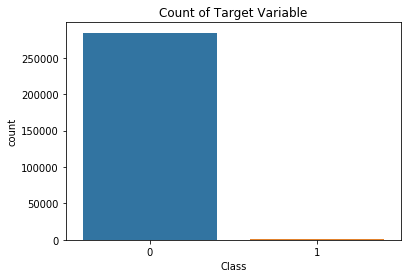

time: 313 ms


In [7]:
plt.title('Count of Target Variable')
sns.countplot(x='Class', data= df)

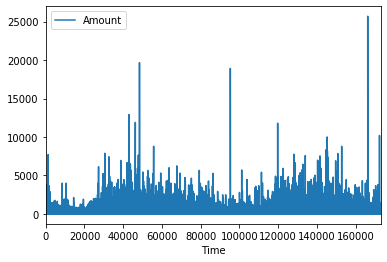

time: 946 ms


In [8]:
df.iloc[:,[0,-2]].set_index('Time').plot()

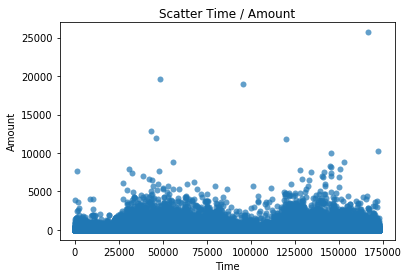

time: 4.23 s


In [9]:
# Examine distribution of amount across time

plt.title('Scatter Time / Amount')
sns.scatterplot(df.Time, df.Amount, linewidth=0, alpha = 0.7)

### Undersampling

In [10]:
df = df.sample(frac=1, random_state=0)
normal = df.loc[df.Class==0]
print(normal.shape)
norm_sample = df[:492]
fraud = df.loc[df.Class==1]
print(fraud.shape)
fraud.head()

equal_df = pd.concat([norm_sample,fraud]).sample(frac=1)
equal_df

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251143,155239.00,2.12,-0.02,-2.25,0.10,0.84,-0.62,0.49,-0.25,0.04,...,0.11,0.41,-0.05,0.34,0.40,0.69,-0.13,-0.09,0.76,0
145419,86928.00,0.27,0.70,-0.44,-1.32,1.30,0.26,0.54,-0.90,-0.31,...,0.97,0.35,-0.56,-0.29,1.50,-0.10,0.13,0.20,2.29,0
142557,84789.00,-1.43,-0.80,1.12,0.39,-0.28,-0.06,1.33,0.20,-0.55,...,0.33,0.01,0.84,0.11,0.16,-0.62,-0.12,0.04,354.33,1
34709,37792.00,-0.75,-1.23,2.17,-0.98,-0.85,-0.41,-0.92,0.12,-2.20,...,-0.29,-0.55,0.35,0.36,-0.38,-0.30,0.14,0.14,67.00,0
249607,154493.00,-7.38,-7.45,-4.70,3.73,6.20,-6.41,-5.83,1.46,-0.65,...,1.18,-0.98,-0.28,-0.64,0.12,0.40,0.70,-1.23,35.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276692,167248.00,1.81,-2.45,-2.30,-2.40,0.71,3.70,-1.58,0.83,-1.23,...,-0.00,-0.12,0.09,0.70,-0.33,-0.18,0.00,-0.01,249.00,0
9179,13126.00,-2.88,5.23,-11.06,6.69,-5.76,-2.24,-11.20,4.01,-3.43,...,2.00,0.35,0.80,-0.78,-1.65,0.49,1.43,0.58,1.00,1
215132,139951.00,-2.92,-0.23,-5.88,2.20,-1.94,0.63,-1.25,1.51,-1.90,...,1.44,0.90,1.39,-2.03,0.51,0.17,0.73,0.23,723.21,1
178713,123745.00,1.89,-0.62,-0.71,-0.05,0.40,1.98,-1.05,0.63,0.99,...,0.24,0.99,0.19,-0.88,-0.40,0.65,0.02,-0.07,1.18,0


time: 231 ms


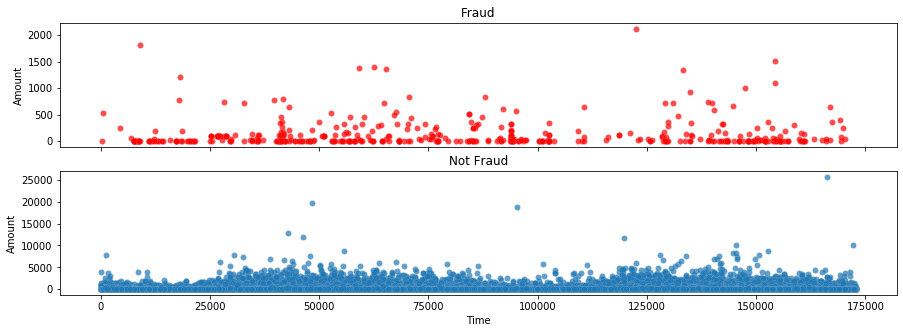

time: 4.77 s


In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5),sharex=True)
ax1.set_title('Fraud')
sns.scatterplot(fraud.Time, fraud.Amount, linewidth=0.1, color = 'red', alpha = 0.7, ax=ax1)
ax2.set_title('Not Fraud')
sns.scatterplot(normal.Time, normal.Amount, linewidth=0.1, alpha = 0.7, ax=ax2)

## Many outliers can be seen in the Fraud dataset

In [12]:
a = df.columns[1:15]
b = df.columns[15:-2]
a

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14'],
      dtype='object')

time: 5 ms


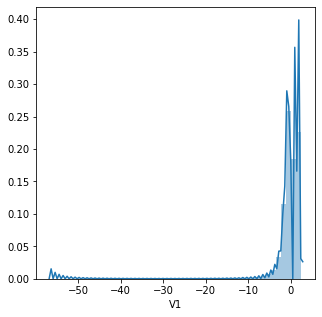

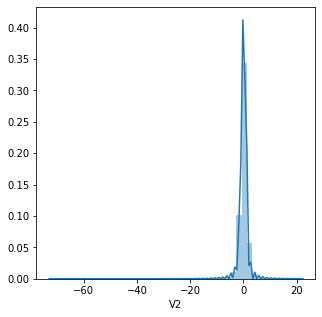

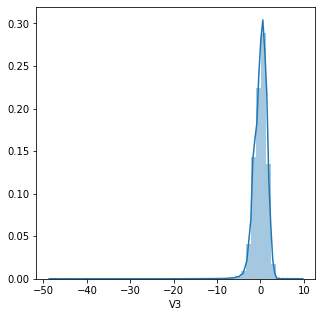

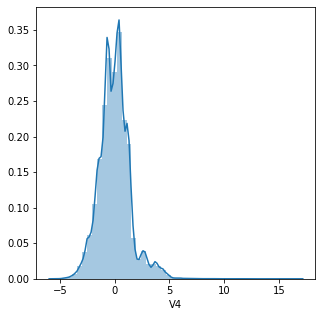

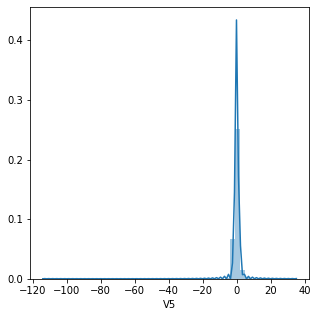

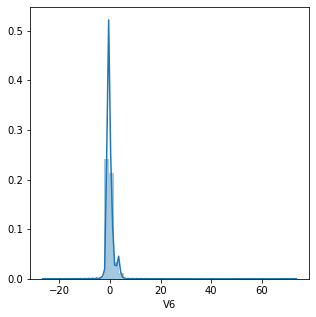

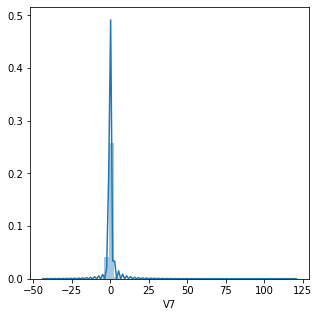

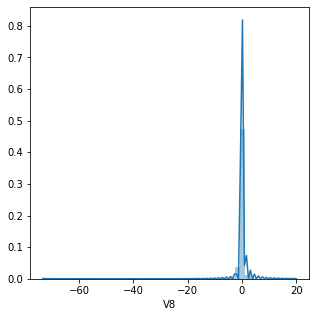

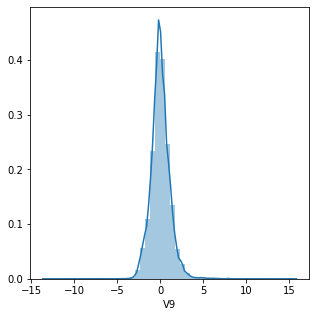

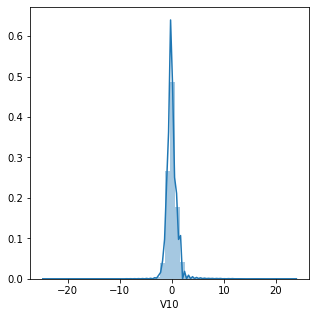

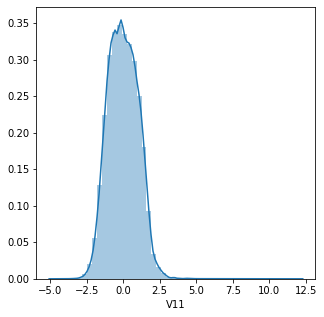

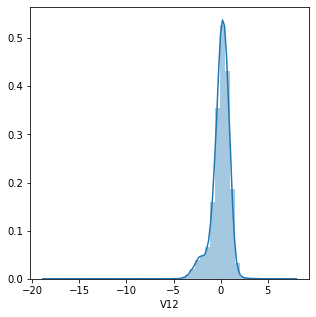

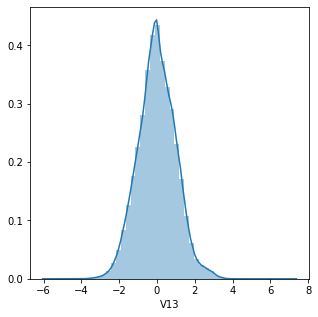

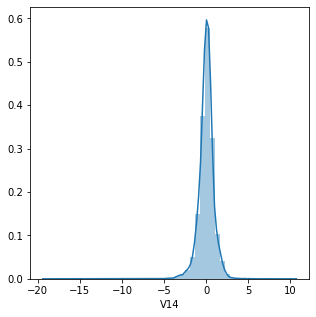

time: 11.5 s


In [13]:
for i in a:
    plt.subplots(figsize=(5,5))
    sns.distplot(df[f'{i}'])

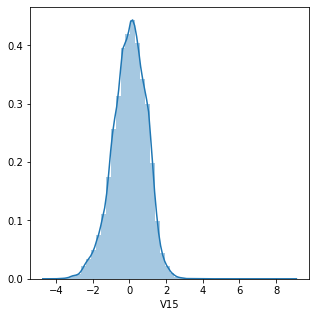

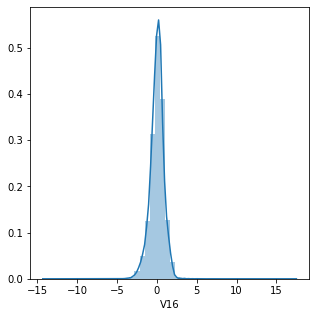

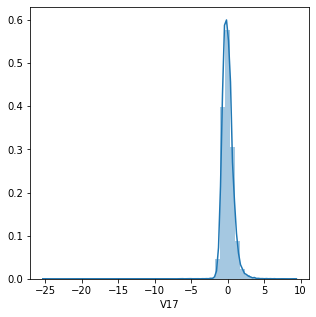

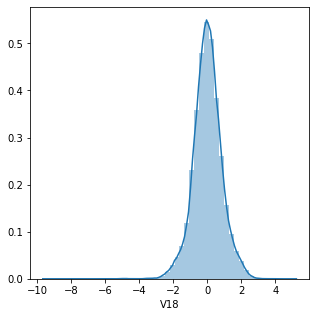

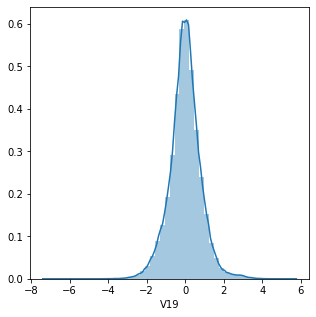

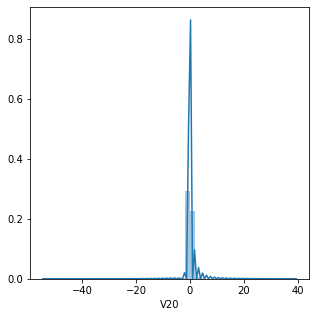

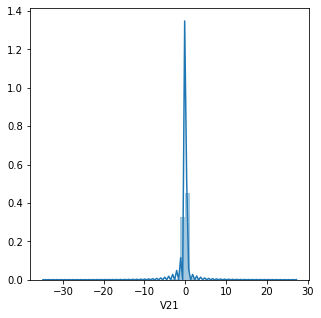

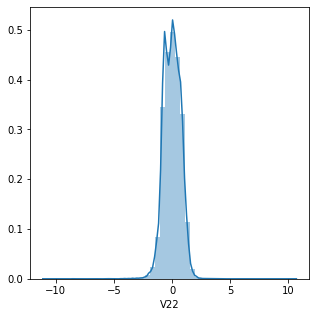

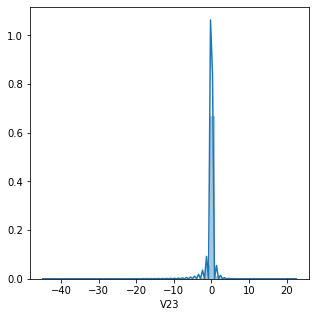

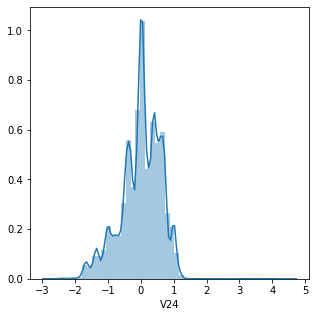

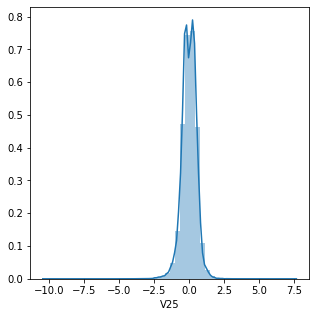

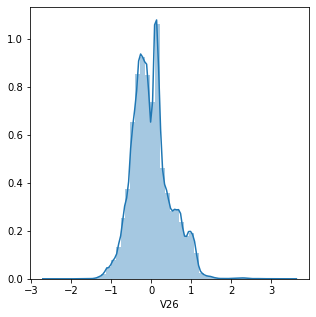

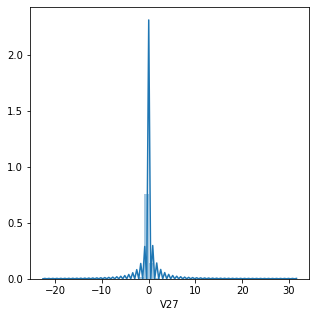

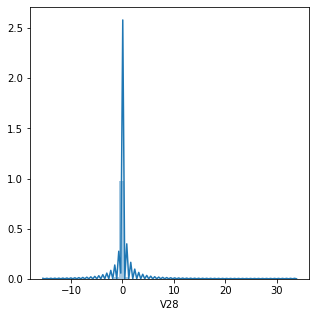

time: 13.5 s


In [14]:
for i in b:
    plt.subplots(figsize=(5,5))
    sns.distplot(df[f'{i}'])

In [16]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,rc_amount,rc_time
183484,-0.32,1.06,-0.05,-0.61,1.26,-0.09,1.16,-0.12,-0.17,-1.64,...,-0.43,-0.26,-0.05,0.21,0.01,0.11,0.16,0,0.25,0.48
255448,-0.35,0.93,0.14,-0.66,1.17,-0.73,1.01,-0.07,-0.30,-1.19,...,-0.83,-0.03,0.49,-0.40,0.13,0.08,0.18,0,-0.28,0.85
244749,-1.61,-2.41,0.33,0.67,2.37,-1.78,-1.14,0.33,0.90,-0.22,...,1.13,0.97,0.64,-1.80,-1.04,0.29,0.44,0,1.03,0.80
63919,-2.48,0.86,1.44,1.05,-1.86,2.08,0.51,-0.24,-0.26,0.13,...,0.69,0.15,-0.26,0.01,-0.18,-0.51,-0.66,0,4.00,-0.40
11475,1.34,-0.55,0.74,-0.21,-1.11,-0.53,-0.80,-0.06,1.00,0.11,...,-0.07,0.07,0.33,0.38,-0.27,-0.00,0.00,0,-0.24,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.32,1.14,-0.94,0.15,0.11,-0.54,0.49,0.51,-0.49,-0.45,...,-0.24,0.01,-0.77,-0.40,0.32,-0.46,-0.01,0,0.39,0.63
86293,-0.63,0.92,1.48,0.21,0.93,1.26,0.50,0.40,-0.94,-0.85,...,-0.00,0.09,-0.96,-0.52,0.30,0.15,0.11,0,0.04,-0.28
122579,1.51,-0.95,-0.22,-1.64,-0.86,-0.47,-0.67,-0.14,-2.28,1.61,...,-1.38,0.08,-0.58,0.30,-0.50,-0.00,0.00,0,0.18,-0.09
152315,1.80,-1.70,-0.14,-0.62,-1.57,0.08,-1.50,0.18,1.76,0.47,...,0.35,0.12,-0.57,-0.60,-0.30,-0.03,-0.03,0,2.09,0.15


time: 188 ms


In [ ]:
X,y = 

In [15]:
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()

df['rc_amount'] = rc.fit_transform(df.Amount.values.reshape(-1,1))
df['rc_time'] = rc.fit_transform(df.Time.values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis=1)

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,rc_amount,rc_time
183484,-0.32,1.06,-0.05,-0.61,1.26,-0.09,1.16,-0.12,-0.17,-1.64,...,-0.43,-0.26,-0.05,0.21,0.01,0.11,0.16,0,0.25,0.48
255448,-0.35,0.93,0.14,-0.66,1.17,-0.73,1.01,-0.07,-0.30,-1.19,...,-0.83,-0.03,0.49,-0.40,0.13,0.08,0.18,0,-0.28,0.85
244749,-1.61,-2.41,0.33,0.67,2.37,-1.78,-1.14,0.33,0.90,-0.22,...,1.13,0.97,0.64,-1.80,-1.04,0.29,0.44,0,1.03,0.80
63919,-2.48,0.86,1.44,1.05,-1.86,2.08,0.51,-0.24,-0.26,0.13,...,0.69,0.15,-0.26,0.01,-0.18,-0.51,-0.66,0,4.00,-0.40
11475,1.34,-0.55,0.74,-0.21,-1.11,-0.53,-0.80,-0.06,1.00,0.11,...,-0.07,0.07,0.33,0.38,-0.27,-0.00,0.00,0,-0.24,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.32,1.14,-0.94,0.15,0.11,-0.54,0.49,0.51,-0.49,-0.45,...,-0.24,0.01,-0.77,-0.40,0.32,-0.46,-0.01,0,0.39,0.63
86293,-0.63,0.92,1.48,0.21,0.93,1.26,0.50,0.40,-0.94,-0.85,...,-0.00,0.09,-0.96,-0.52,0.30,0.15,0.11,0,0.04,-0.28
122579,1.51,-0.95,-0.22,-1.64,-0.86,-0.47,-0.67,-0.14,-2.28,1.61,...,-1.38,0.08,-0.58,0.30,-0.50,-0.00,0.00,0,0.18,-0.09
152315,1.80,-1.70,-0.14,-0.62,-1.57,0.08,-1.50,0.18,1.76,0.47,...,0.35,0.12,-0.57,-0.60,-0.30,-0.03,-0.03,0,2.09,0.15


time: 742 ms


In [601]:
equal_df['rc_amount'] = rc.fit_transform(equal_df.Amount.values.reshape(-1,1))
equal_df['rc_time'] = rc.fit_transform(equal_df.Time.values.reshape(-1,1))
equal_df = equal_df.drop(['Time','Amount'], axis=1)
equal_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,rc_amount,rc_time
17317,-27.85,15.60,-28.92,6.42,-20.35,-4.83,-19.21,18.33,-3.67,-8.01,...,-2.06,-1.27,0.17,2.00,-0.21,1.32,0.39,1,0.81,-0.59
85584,-0.46,0.12,1.79,-1.31,-0.42,-0.22,-0.02,0.17,-1.34,0.07,...,0.74,-0.12,0.08,-0.11,-0.19,0.11,0.09,0,-0.11,-0.22
14884,1.26,0.32,0.29,0.70,-0.41,-1.08,0.06,-0.18,0.10,-0.27,...,-0.87,0.13,0.33,0.20,0.10,-0.03,0.03,0,-0.20,-0.62
154693,-2.49,4.36,-7.78,5.36,-1.82,-2.45,-4.96,1.48,-2.95,-7.18,...,1.02,-0.27,-0.37,0.37,0.08,0.18,-0.21,1,-0.21,0.27
157871,-2.45,2.11,-5.14,1.41,-1.69,-0.74,-3.66,1.94,-0.79,-5.62,...,0.36,0.23,-0.28,-0.32,0.49,0.36,-0.12,1,0.61,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283001,-0.99,1.26,-1.68,-0.34,0.37,-0.99,0.98,0.48,-0.77,-0.54,...,1.04,-0.22,-0.28,-0.31,-0.16,0.15,0.05,0,0.68,1.06
236597,1.58,-2.40,0.48,-0.30,-2.26,0.92,-1.91,0.44,1.45,0.44,...,1.22,-0.13,-0.26,-0.33,-0.00,0.04,-0.01,0,2.25,0.80
111690,-4.20,0.19,-3.92,3.92,-1.88,-2.12,-3.61,1.69,-2.19,-4.68,...,-0.18,-0.44,0.29,-0.14,-0.25,1.25,-0.13,1,2.24,-0.08
142833,-4.47,1.15,0.02,3.26,-0.26,1.20,-3.97,-3.84,-2.28,-0.43,...,0.12,-1.82,-0.18,-0.80,-0.02,0.07,-0.78,0,1.36,0.06


time: 79.7 ms


In [371]:
# remove from end of list, add to front for reindexing, then reindex with the list
cols = df.columns.tolist()
cols.insert(0, cols.pop())
cols.insert(0, cols.pop())
df = df.reindex(columns=cols)
equal_df = equal_df.reindex(columns=cols)
df

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
183484,0.25,0.48,-0.32,1.06,-0.05,-0.61,1.26,-0.09,1.16,-0.12,...,0.19,-0.21,-0.43,-0.26,-0.05,0.21,0.01,0.11,0.16,0
255448,-0.28,0.85,-0.35,0.93,0.14,-0.66,1.17,-0.73,1.01,-0.07,...,-0.10,-0.27,-0.83,-0.03,0.49,-0.40,0.13,0.08,0.18,0
244749,1.03,0.80,-1.61,-2.41,0.33,0.67,2.37,-1.78,-1.14,0.33,...,0.42,0.70,1.13,0.97,0.64,-1.80,-1.04,0.29,0.44,0
63919,4.00,-0.40,-2.48,0.86,1.44,1.05,-1.86,2.08,0.51,-0.24,...,-0.99,0.81,0.69,0.15,-0.26,0.01,-0.18,-0.51,-0.66,0
11475,-0.24,-0.76,1.34,-0.55,0.74,-0.21,-1.11,-0.53,-0.80,-0.06,...,-0.13,-0.14,-0.07,0.07,0.33,0.38,-0.27,-0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,0.39,0.63,-1.32,1.14,-0.94,0.15,0.11,-0.54,0.49,0.51,...,-0.44,-0.01,-0.24,0.01,-0.77,-0.40,0.32,-0.46,-0.01,0
86293,0.04,-0.28,-0.63,0.92,1.48,0.21,0.93,1.26,0.50,0.40,...,0.09,-0.05,-0.00,0.09,-0.96,-0.52,0.30,0.15,0.11,0
122579,0.18,-0.09,1.51,-0.95,-0.22,-1.64,-0.86,-0.47,-0.67,-0.14,...,-0.28,-0.56,-1.38,0.08,-0.58,0.30,-0.50,-0.00,0.00,0
152315,2.09,0.15,1.80,-1.70,-0.14,-0.62,-1.57,0.08,-1.50,0.18,...,0.15,0.18,0.35,0.12,-0.57,-0.60,-0.30,-0.03,-0.03,0


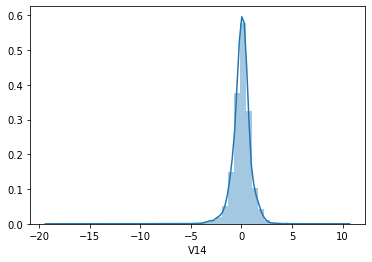

In [372]:
sns.distplot(df.V14)

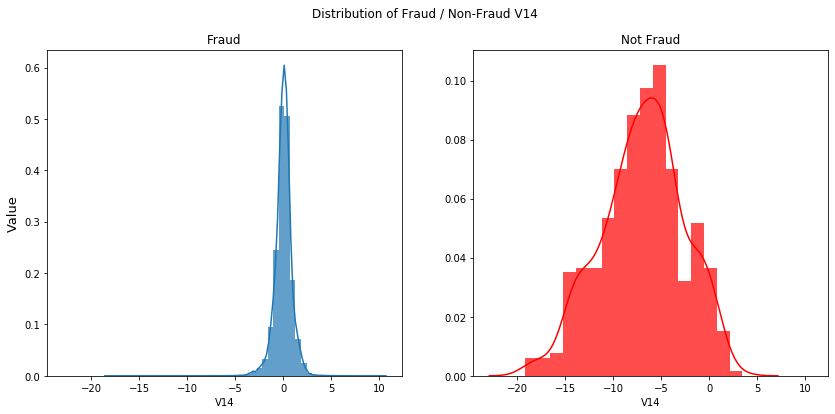

In [373]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6),sharex=True)
fig.suptitle('Distribution of Fraud / Non-Fraud V14')
ax1.set_title('Fraud')
ax1.set_ylabel('Value', fontsize=13)
sns.distplot(normal.V14, ax= ax1, hist_kws=dict(alpha=0.7))
ax2.set_title('Not Fraud')
sns.distplot(fraud.V14, ax= ax2, color = 'red', hist_kws=dict(alpha=.7))

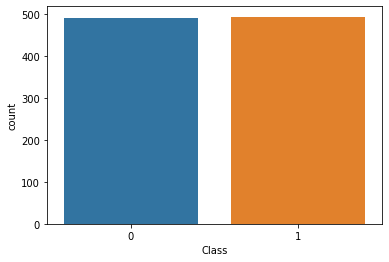

In [374]:
# check the levels of classes
sns.countplot(equal_df.Class)

In [375]:
reg_corr = df.corr()
corr = equal_df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.24,-0.23,0.14,-0.21,0.28,0.12,0.21,-0.13,0.16,...,-0.06,0.12,0.06,0.03,-0.21,-0.02,-0.13,-0.00,0.04,-0.14
V1,0.24,1.00,-0.82,0.89,-0.62,0.86,0.32,0.88,-0.08,0.68,...,0.01,-0.04,-0.05,-0.05,-0.08,0.06,0.19,0.20,-0.02,-0.44
V2,-0.23,-0.82,1.00,-0.86,0.69,-0.79,-0.30,-0.85,-0.02,-0.71,...,0.04,-0.00,0.15,-0.01,0.12,-0.00,-0.16,0.03,-0.23,0.50
V3,0.14,0.89,-0.86,1.00,-0.77,0.85,0.45,0.88,-0.17,0.77,...,0.03,-0.07,-0.03,0.02,-0.09,-0.02,0.10,0.14,-0.02,-0.56
V4,-0.21,-0.62,0.69,-0.77,1.00,-0.58,-0.45,-0.71,0.11,-0.79,...,-0.03,0.13,0.02,-0.12,-0.04,0.14,-0.01,-0.07,-0.00,0.71
V5,0.28,0.86,-0.79,0.85,-0.58,1.00,0.29,0.82,-0.21,0.66,...,0.05,-0.10,-0.09,-0.12,-0.08,0.06,0.18,0.20,-0.15,-0.37
V6,0.12,0.32,-0.30,0.45,-0.45,0.29,1.00,0.29,-0.56,0.37,...,0.04,0.00,0.32,0.01,-0.14,-0.05,-0.13,-0.08,0.21,-0.42
V7,0.21,0.88,-0.85,0.88,-0.71,0.82,0.29,1.00,0.09,0.76,...,0.04,-0.12,-0.09,-0.04,0.04,0.03,0.25,0.12,0.17,-0.47
V8,-0.13,-0.08,-0.02,-0.17,0.11,-0.21,-0.56,0.09,1.00,-0.07,...,-0.12,0.04,-0.43,0.08,0.23,0.04,0.28,-0.01,0.02,0.06
V9,0.16,0.68,-0.71,0.77,-0.79,0.66,0.37,0.76,-0.07,1.00,...,0.16,-0.25,-0.05,0.02,-0.02,-0.12,0.14,0.15,0.03,-0.56


Text(0.5, 1, 'Correlation of Features Imbalanced')

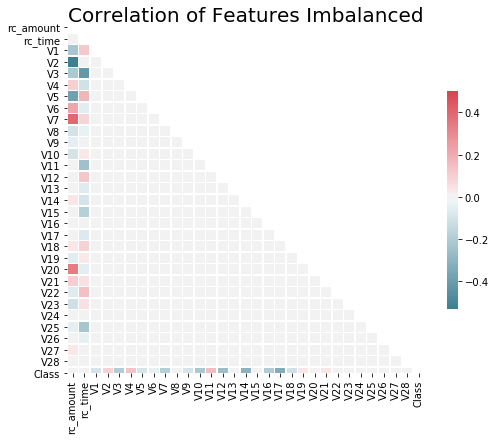

In [376]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(reg_corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation of Features Imbalanced', fontsize=20)

Text(0.5, 1, 'Heatmap for Correlation of Features Balanced')

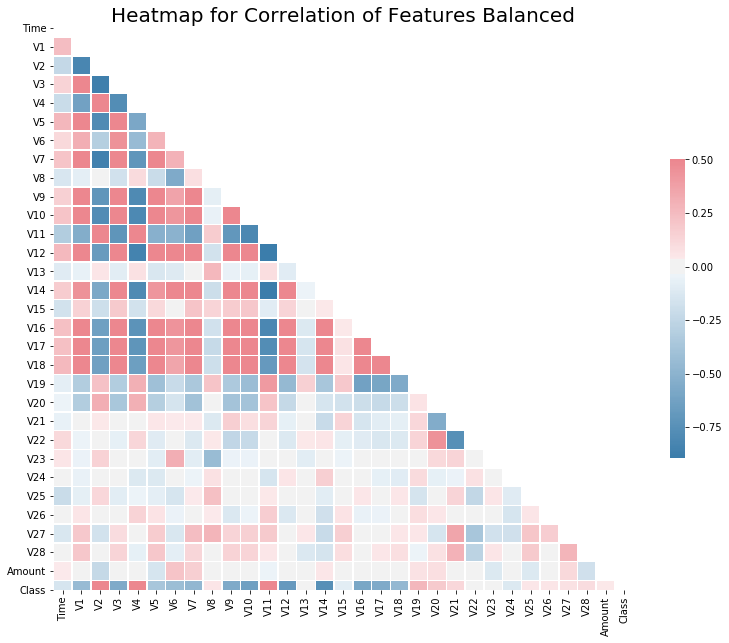

In [377]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap (5000, -100000)
cmap = sns.diverging_palette(240, 10, s=80, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap for Correlation of Features Balanced', fontsize=20)

Text(0.5, 1.0, 'V10 Distribution Fraud')

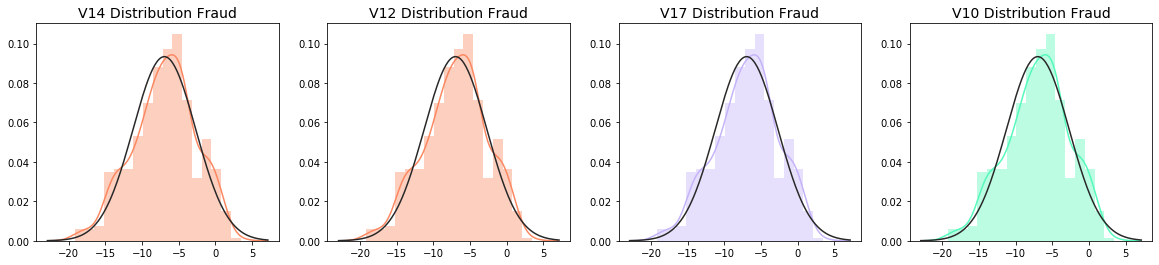

In [378]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 4))

v14_fraud_dist = equal_df['V14'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#9ad6aa')
ax1.set_title('V14 Distribution Fraud', fontsize=14)

v12_fraud_dist = equal_df['V12'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V12 Distribution Fraud', fontsize=14)

v17_fraud_dist = equal_df['V17'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V17 Distribution Fraud', fontsize=14)

v10_fraud_dist = equal_df['V10'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax4, fit=norm, color='#56F9BB')
ax4.set_title('V10 Distribution Fraud', fontsize=14)


Text(0.5, 1.0, 'V10 Distribution Normal')

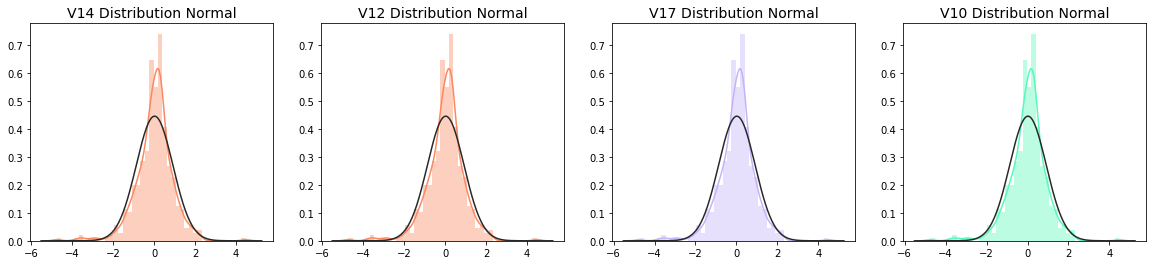

In [379]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 4))

v14_fraud_dist = equal_df['V14'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='##9ad6aa')
ax1.set_title('V14 Distribution Normal', fontsize=14)

v12_fraud_dist = equal_df['V12'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V12 Distribution Normal', fontsize=14)

v17_fraud_dist = equal_df['V17'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V17 Distribution Normal', fontsize=14)

v10_fraud_dist = equal_df['V10'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax4, fit=norm, color='#56F9BB')
ax4.set_title('V10 Distribution Normal', fontsize=14)


Text(0.5, 1.0, 'V10 Distribution Normal')

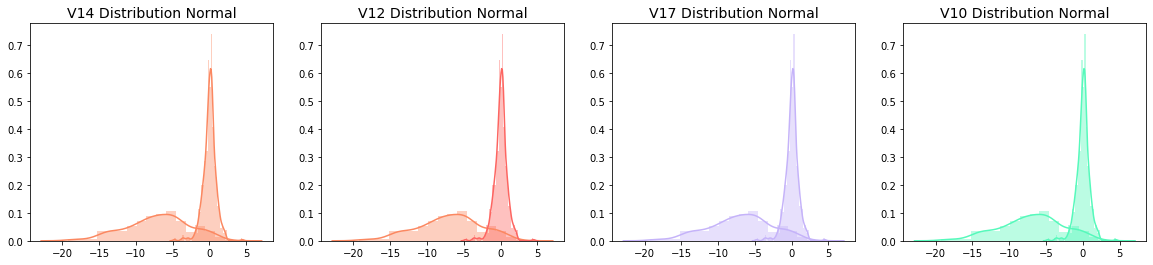

In [380]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 4))

v14_fraud_dist = equal_df['V14'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, color='#FB8861')
ax1.set_title('V14 Distribution Fraud', fontsize=14)

v12_fraud_dist = equal_df['V12'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax2, color='#FB8861')
ax2.set_title('V12 Distribution Fraud', fontsize=14)

v17_fraud_dist = equal_df['V17'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax3, color='#C5B3F9')
ax3.set_title('V17 Distribution Fraud', fontsize=14)

v10_fraud_dist = equal_df['V10'].loc[equal_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax4, color='#56F9BB')
ax4.set_title('V10 Distribution Fraud', fontsize=14)

v14_fraud_dist = equal_df['V14'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax1, color='#FB8861')
ax1.set_title('V14 Distribution Normal', fontsize=14)

v12_fraud_dist = equal_df['V12'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax2, color='#FD6561')
ax2.set_title('V12 Distribution Normal', fontsize=14)

v17_fraud_dist = equal_df['V17'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax3, color='#C5B3F9')
ax3.set_title('V17 Distribution Normal', fontsize=14)

v10_fraud_dist = equal_df['V10'].loc[equal_df['Class'] == 0].values
sns.distplot(v14_fraud_dist, ax=ax4,  color='#56F9BB')
ax4.set_title('V10 Distribution Normal', fontsize=14)

Text(0.5, 0.93, 'Distribution of Features V1-V28 Balanced Data')

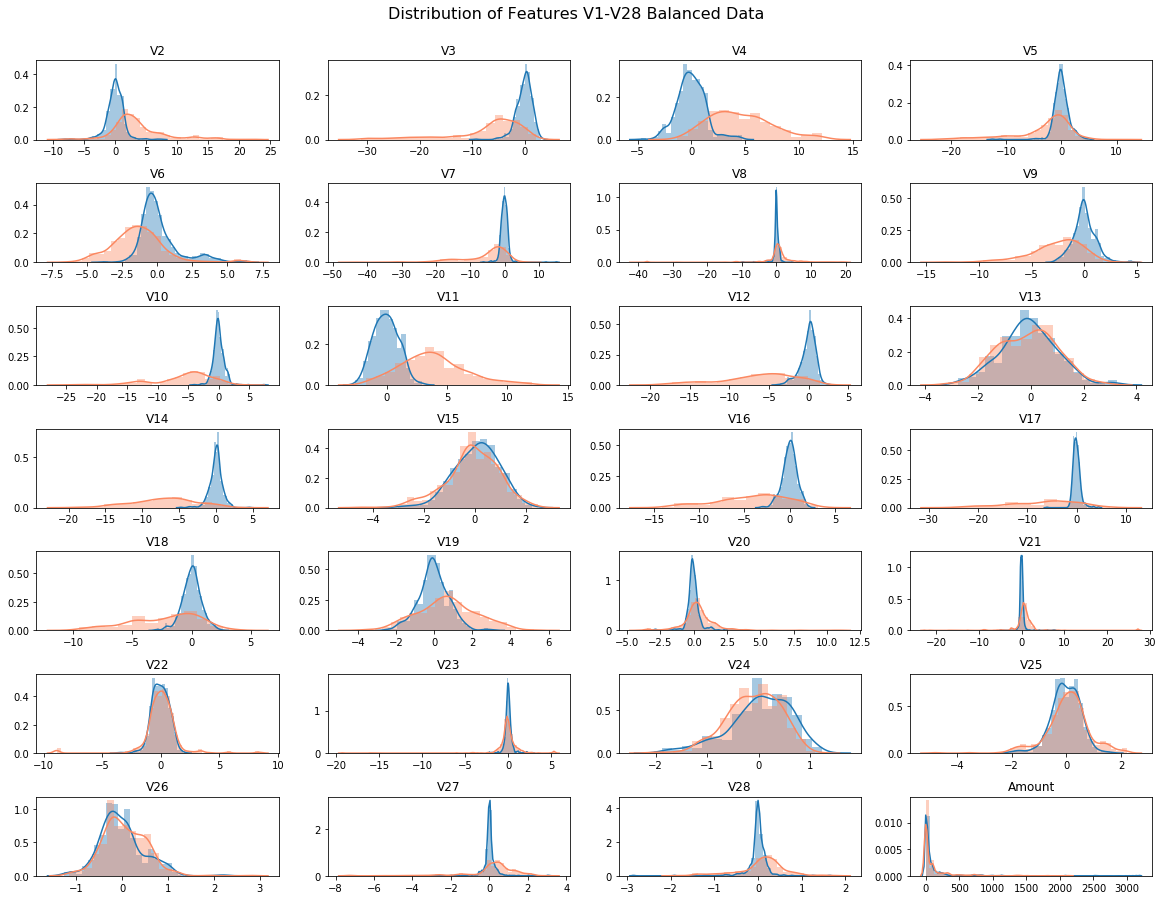

In [381]:
fig, ax = plt.subplots(7,4, figsize=(20, 15))

for i, column in enumerate(equal_df.columns[2:-1]):
    sns.distplot(equal_df[column].loc[equal_df['Class']==0].values,ax=ax[i//4,i%4])
    sns.distplot(equal_df[column].loc[equal_df['Class']==1].values,ax=ax[i//4,i%4], color='#FB8861')
    ax[i//4,i%4].set_title(column)
    plt.subplots_adjust(hspace=.55)
fig.suptitle('Distribution of Features V1-V28 Balanced Data', y=.93, fontsize = 16)

Text(0.5, 0.93, 'Distribution of Features V1-V28 Full Data')

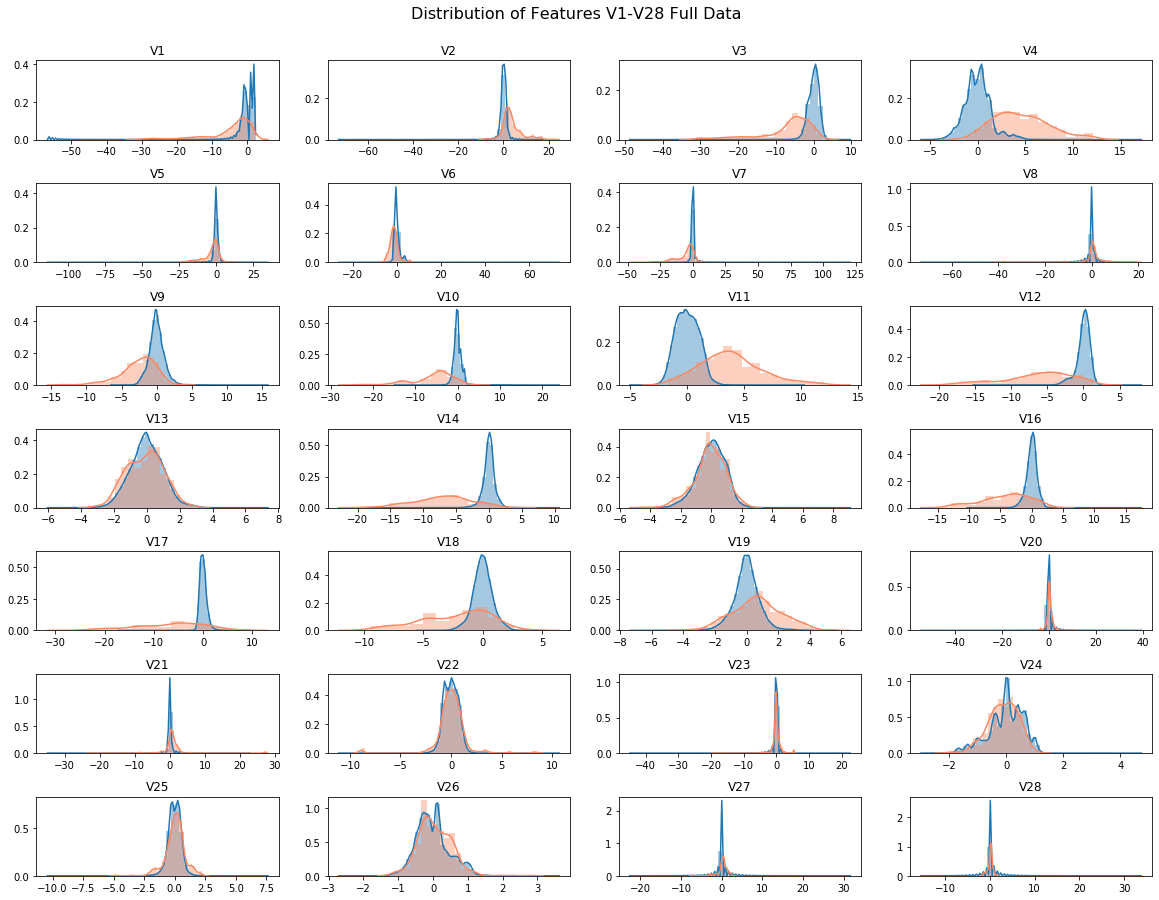

In [382]:
fig, ax = plt.subplots(7,4, figsize=(20, 15))

for i, column in enumerate(df.columns[2:-1]):
    sns.distplot(df[column].loc[df['Class']==0].values,ax=ax[i//4,i%4])
    sns.distplot(df[column].loc[df['Class']==1].values,ax=ax[i//4,i%4], color='#FB8861')
    ax[i//4,i%4].set_title(column)
    plt.subplots_adjust(hspace=.55)
fig.suptitle('Distribution of Features V1-V28 Full Data', y=.93, fontsize = 16)

In [383]:
# D’Agostino’s K^2 Test
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

alpha = 0.05
classes = [0,1]
for j in classes:
    for i in equal_df.columns[2:-1]:
        stat, p = normaltest(equal_df[f'{i}'].loc[equal_df['Class']==j])
        if p > alpha:
            print(f'{i}: Class:{j} Statistics=%.3f, p=%.3f' % (stat, p))
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            None

V13: Class:0 Statistics=2.207, p=0.332
Sample looks Gaussian (fail to reject H0)
V19: Class:1 Statistics=0.879, p=0.644
Sample looks Gaussian (fail to reject H0)


In [384]:
# Anderson Darling Test for Normality
for j in classes:
    for h in equal_df.columns[2:-1]:    
        result = anderson(equal_df[f'{h}'].loc[equal_df['Class']==j])
        p = 0
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic < result.critical_values[i]:
                print(f'{h}: Class: {j} Statistic: %.3f' % result.statistic)
                print('%.3f: %.3f, Gaussian (fail to reject H0)' % (sl, cv))
                print(' ')
            else:
                None

V11: Class: 0 Statistic: 0.745
5.000: 0.781, Gaussian (fail to reject H0)
 
V11: Class: 0 Statistic: 0.745
2.500: 0.911, Gaussian (fail to reject H0)
 
V11: Class: 0 Statistic: 0.745
1.000: 1.083, Gaussian (fail to reject H0)
 
V13: Class: 0 Statistic: 0.446
15.000: 0.571, Gaussian (fail to reject H0)
 
V13: Class: 0 Statistic: 0.446
10.000: 0.651, Gaussian (fail to reject H0)
 
V13: Class: 0 Statistic: 0.446
5.000: 0.781, Gaussian (fail to reject H0)
 
V13: Class: 0 Statistic: 0.446
2.500: 0.911, Gaussian (fail to reject H0)
 
V13: Class: 0 Statistic: 0.446
1.000: 1.083, Gaussian (fail to reject H0)
 
V15: Class: 0 Statistic: 0.692
5.000: 0.781, Gaussian (fail to reject H0)
 
V15: Class: 0 Statistic: 0.692
2.500: 0.911, Gaussian (fail to reject H0)
 
V15: Class: 0 Statistic: 0.692
1.000: 1.083, Gaussian (fail to reject H0)
 
V22: Class: 0 Statistic: 0.896
2.500: 0.911, Gaussian (fail to reject H0)
 
V22: Class: 0 Statistic: 0.896
1.000: 1.083, Gaussian (fail to reject H0)
 
V19: Class

## As many of our features are non-parametric, we will use IQR for anomaly detection

In [385]:
corr.Class.sort_values()

V14      -0.75
V12      -0.68
V10      -0.63
V16      -0.59
V9       -0.56
V3       -0.56
V17      -0.56
V7       -0.47
V18      -0.47
V1       -0.44
V6       -0.42
V5       -0.37
Time     -0.14
V24      -0.12
V15      -0.09
V23      -0.02
V13      -0.02
V22       0.02
Amount    0.05
V25       0.05
V8        0.06
V26       0.06
V27       0.08
V28       0.10
V21       0.12
V20       0.18
V19       0.27
V2        0.50
V11       0.69
V4        0.71
Class     1.00
Name: Class, dtype: float64

Text(0.5, 0.93, 'Quartile Boxplots of Features V1-V28')

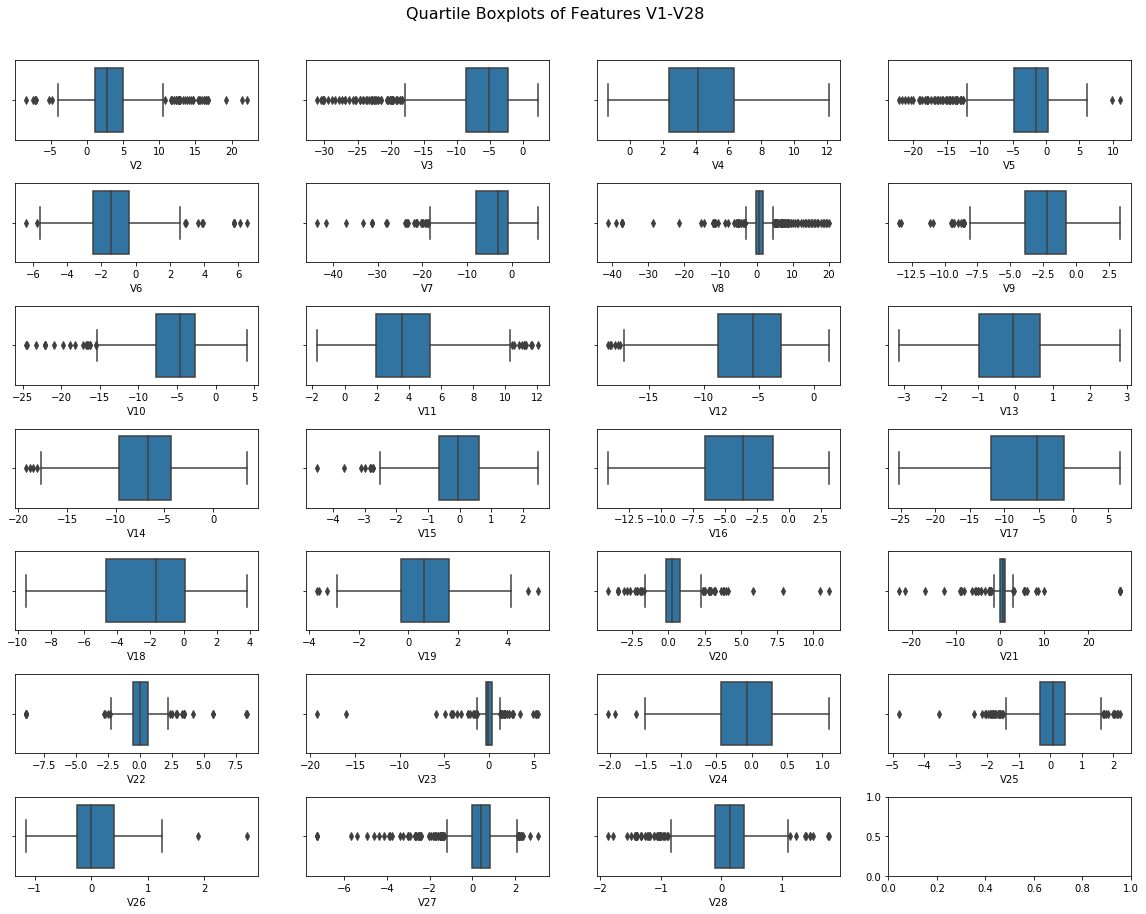

In [386]:
fig, ax = plt.subplots(7,4, figsize=(20, 15))

for i, column in enumerate(equal_df.columns[2:-2]):
    sns.boxplot(df[column].loc[df['Class']==1],ax=ax[i//4,i%4])
    plt.subplots_adjust(hspace=.55)

fig.suptitle('Quartile Boxplots of Features V1-V28', y=.93, fontsize = 16)

In [526]:
# https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

# Build IQR function that removes outliers

neg_cor = ['V14','V12','V10','V16']
def iqr_outlier(df,feats):
    for i in feats:
        print(f'--- {i} ----')
        v = df[f'{i}'].loc[df['Class'] == 1].values
        q1, q3 = np.percentile(v, 25), np.percentile(v, 75)
        print(f'Quartile 1: {q1} | Quartile 3: {q3}')
        iqr = q3 - q1
        print(f'IQR: {iqr:.4}')

        v_lim = iqr * 1.5
        lower, upper = q1 - v_lim, q3 + v_lim
        print(f'Limit: {v_lim:.4}')
        print(f'{i} Lower Bound: {v_lower:.4}')
        print(f'{i} Upper Bound: {v_upper:.4}')

        outliers = [x for x in v if x < v_lower or x > v_upper]
        print(f'Feature {i} Outliers for Fraud: {len(outliers)}')
        if len(outliers) < 20:
            print(f'{i} outliers:{outliers}')
        else:
            print(f'{i} outliers:{outliers[:20]}')
        print(' ')
        df = df.drop(df[(df[f'{i}'] > v_upper) | (df[f'{i}'] < v_lower)].index)
    return df


time: 6.03 ms


In [603]:
# Remove the outliers

equal_df = iqr_outlier(equal_df, neg_cor)
equal_df

--- V14 ----
Quartile 1: -7.76372550932836 | Quartile 3: -3.541625007582585
IQR: 4.222
Limit: 6.333
V14 Lower Bound: -11.13
V14 Upper Bound: 5.576
Feature V14 Outliers for Fraud: 0
V14 outliers:[]
 
--- V12 ----
Quartile 1: -6.40906151594673 | Quartile 3: -2.3210655099520947
IQR: 4.088
Limit: 6.132
V12 Lower Bound: -11.13
V12 Upper Bound: 5.576
Feature V12 Outliers for Fraud: 0
V12 outliers:[]
 
--- V10 ----
Quartile 1: -5.312681966311805 | Quartile 3: -1.9425436906585598
IQR: 3.37
Limit: 5.055
V10 Lower Bound: -11.13
V10 Upper Bound: 5.576
Feature V10 Outliers for Fraud: 0
V10 outliers:[]
 
--- V16 ----
Quartile 1: -4.729245920649595 | Quartile 3: -0.5978968087928185
IQR: 4.131
Limit: 6.197
V16 Lower Bound: -11.13
V16 Upper Bound: 5.576
Feature V16 Outliers for Fraud: 0
V16 outliers:[]
 


,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
17317,0.81,-0.59,-27.85,15.60,-28.92,6.42,-20.35,-4.83,-19.21,18.33,...,1.70,1.80,-2.06,-1.27,0.17,2.00,-0.21,1.32,0.39,1
85584,-0.11,-0.22,-0.46,0.12,1.79,-1.31,-0.42,-0.22,-0.02,0.17,...,0.02,0.30,0.74,-0.12,0.08,-0.11,-0.19,0.11,0.09,0
14884,-0.20,-0.62,1.26,0.32,0.29,0.70,-0.41,-1.08,0.06,-0.18,...,-0.11,-0.29,-0.87,0.13,0.33,0.20,0.10,-0.03,0.03,0
154693,-0.21,0.27,-2.49,4.36,-7.78,5.36,-1.82,-2.45,-4.96,1.48,...,0.79,1.33,1.02,-0.27,-0.37,0.37,0.08,0.18,-0.21,1
157871,0.61,0.36,-2.45,2.11,-5.14,1.41,-1.69,-0.74,-3.66,1.94,...,-0.13,0.80,0.36,0.23,-0.28,-0.32,0.49,0.36,-0.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283001,0.68,1.06,-0.99,1.26,-1.68,-0.34,0.37,-0.99,0.98,0.48,...,-0.26,0.36,1.04,-0.22,-0.28,-0.31,-0.16,0.15,0.05,0
236597,2.25,0.80,1.58,-2.40,0.48,-0.30,-2.26,0.92,-1.91,0.44,...,0.40,0.45,1.22,-0.13,-0.26,-0.33,-0.00,0.04,-0.01,0
111690,2.24,-0.08,-4.20,0.19,-3.92,3.92,-1.88,-2.12,-3.61,1.69,...,1.00,0.80,-0.18,-0.44,0.29,-0.14,-0.25,1.25,-0.13,1
142833,1.36,0.06,-4.47,1.15,0.02,3.26,-0.26,1.20,-3.97,-3.84,...,0.12,-2.73,0.12,-1.82,-0.18,-0.80,-0.02,0.07,-0.78,0


time: 111 ms


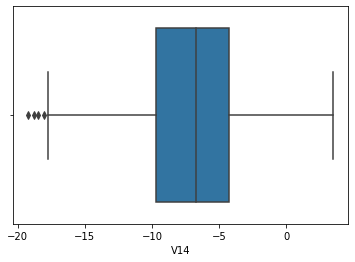

In [389]:
sns.boxplot(df['V14'].loc[df['Class']==1])

In [604]:
# Split original dataframe
X, y = df.loc[:, df.columns!='Class'], df.Class
Xe, ye = equal_df.loc[:, equal_df.columns!='Class'], equal_df.Class
X.head(2)

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
183484,0.25,0.48,-0.32,1.06,-0.05,-0.61,1.26,-0.09,1.16,-0.12,...,0.85,0.19,-0.21,-0.43,-0.26,-0.05,0.21,0.01,0.11,0.16
255448,-0.28,0.85,-0.35,0.93,0.14,-0.66,1.17,-0.73,1.01,-0.07,...,-0.15,-0.10,-0.27,-0.83,-0.03,0.49,-0.40,0.13,0.08,0.18


time: 272 ms


In [605]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe,ye,test_size=.2, random_state=0)

time: 198 ms


In [736]:
logreg = LogisticRegression(solver='lbfgs', C=1, max_iter=200).fit(X_smote,y_smote)
print(f'Train: {logreg.score(X_train,y_train)} Test: {logreg.score(X_test,y_test)}')

Train: 0.9709276042923918 Test: 0.9708050981355991
time: 7.79 s


In [734]:
# lre = LogisticRegression(C = .01, solver='lbfgs', penalty = 'l2')
lre = LogisticRegression(C = 1, penalty = 'l2', max_iter=200)
lre.fit(Xe_train,ye_train.values.ravel())

print(f'Train: {lre.score(Xe_train,ye_train)} Test: {lre.score(Xe_test,ye_test)}')

Train: 0.9421965317919075 Test: 0.9421965317919075
time: 46 ms


In [735]:

# Create hyperparameter options
hyperparameters = {'C': [0.001,0.01,0.1,1,10,100]}

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=3, verbose=1)
best_model = clf.fit(X_test, y_test)
best_model.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.6s finished


{'C': 1}

time: 9.54 s


Recall metric in the testing dataset:  0.62
F1 Score: 0.7167630057803469
Confusion matrix, without normalization


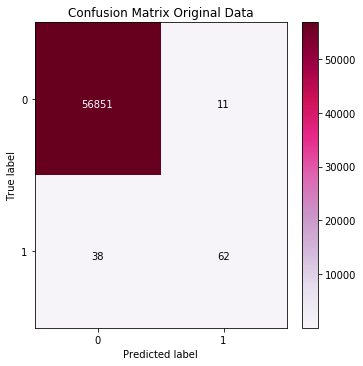

In [395]:
# Compute Confusion Matrix Original Data

y_pred = logreg.predict(X_test.values)

cnf_matrix1 = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix1[1,1]/(cnf_matrix1[1,0]+cnf_matrix1[1,1]))
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix1, classes=class_names, title='Confusion Matrix Original Data')
plt.xlim(-0.5, len(np.unique(y))-0.5)
plt.ylim(len(np.unique(y))-0.5, -0.5)
plt.show()

Recall metric in the testing dataset:  0.8645833333333334
Confusion matrix, without normalization


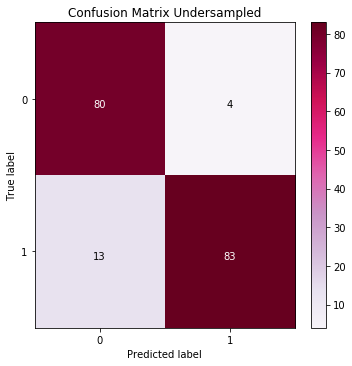

In [396]:
# Compute confusion matrix Undersampled Data

y_pred_undersample = lre.predict(Xe_test.values)

cnf_matrix = confusion_matrix(ye_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix Undersampled')
plt.xlim(-0.5, len(np.unique(y))-0.5)
plt.ylim(len(np.unique(y))-0.5, -0.5)
plt.show()

In [397]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(ye_test.ravel(), y_pred_undersample, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted   0   1  All
True                  
0          80   4   84
1          13  83   96
All        93  87  180


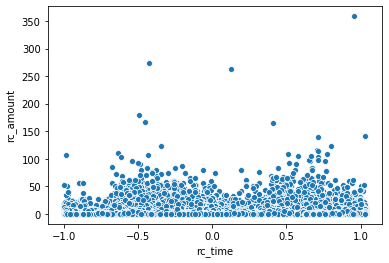

In [398]:
sns.scatterplot(df.rc_time, df.rc_amount)

### KNN
#### From examining from neighbors 1, 3, 5, 7, & 9, we find the optimal N at 3 Neighbors

In [606]:
statistics = pd.DataFrame([])
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i).fit(Xe_train,ye_train)
    y_pred_knn = knn.predict(Xe_test.values)
    y_probs = knn.predict_proba(Xe_test)[:,1]
    
    fpr, tpr, _ = roc_curve(ye_test, y_probs)
    roc_auc = auc(fpr, tpr)
    print(f'Neighbors: {i} | Train: {knn.score(Xe_train,ye_train):.2%} | Test: {knn.score(Xe_test,ye_test):.2%} | F1 Score: {f1_score(ye_test, y_pred_knn):.2%}| AUC: {roc_auc:.2%}')
    statistics = statistics.append(pd.DataFrame({'Neighbors':i, 'F1':f1_score(ye_test, y_pred_knn), 'AUC':roc_auc}, index=[0]),ignore_index=True)

Neighbors: 1 | Train: 100.00% | Test: 92.49% | F1 Score: 91.16%| AUC: 92.12%
Neighbors: 3 | Train: 94.94% | Test: 93.64% | F1 Score: 92.31%| AUC: 95.99%
Neighbors: 5 | Train: 94.22% | Test: 93.06% | F1 Score: 91.43%| AUC: 96.57%
Neighbors: 7 | Train: 93.64% | Test: 93.64% | F1 Score: 92.09%| AUC: 97.56%
Neighbors: 9 | Train: 93.64% | Test: 92.49% | F1 Score: 90.51%| AUC: 97.92%
Neighbors: 11 | Train: 92.92% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.32%
Neighbors: 13 | Train: 92.34% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.69%
Neighbors: 15 | Train: 92.34% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.69%
Neighbors: 17 | Train: 92.20% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.52%
Neighbors: 19 | Train: 92.34% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.48%
Neighbors: 21 | Train: 92.34% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.48%
Neighbors: 23 | Train: 92.34% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.35%
Neighbors: 25 | Train: 92.20% | Test: 91.91% | F1 Score: 89.71%| AUC: 98.32%
Nei

In [607]:
statistics.sort_values('AUC',ascending=False)

,Neighbors,F1,AUC
7,15,0.90,0.99
6,13,0.90,0.99
8,17,0.90,0.99
9,19,0.90,0.98
10,21,0.90,0.98
11,23,0.90,0.98
19,39,0.90,0.98
12,25,0.90,0.98
5,11,0.90,0.98
16,33,0.90,0.98


time: 38.3 ms


In [611]:
knn9 = KNeighborsClassifier(n_neighbors=3).fit(Xe_train,ye_train)
y_pred_knn = knn9.predict(Xe_test.values)
print(f'F1 Score: {f1_score(ye_test, y_pred_knn):.2%}')

F1 Score: 92.31%
time: 33.2 ms


Recall metric in the testing dataset:  0.53125
Confusion matrix, without normalization


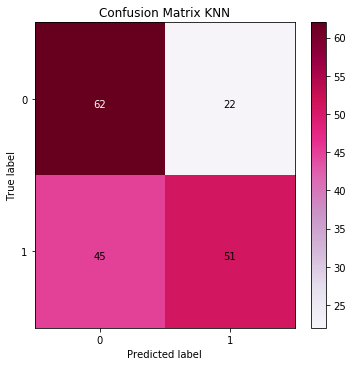

In [404]:
cnf_matrix_knn = confusion_matrix(ye_test,y_pred_knn)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix_knn[1,1]/(cnf_matrix_knn[1,0]+cnf_matrix_knn[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_knn, classes=class_names, title='Confusion Matrix KNN')
plt.xlim(-0.5, len(np.unique(y))-0.5)
plt.ylim(len(np.unique(y))-0.5, -0.5)
plt.show()

### Decision Tree

In [612]:
dt = DecisionTreeClassifier(random_state=0).fit(Xe_train,ye_train)
print(f'Train: {dt.score(Xe_train,ye_train):.2%} | Test: {dt.score(Xe_test,ye_test):.2%}')

Train: 100.00% | Test: 90.75%
time: 39.5 ms


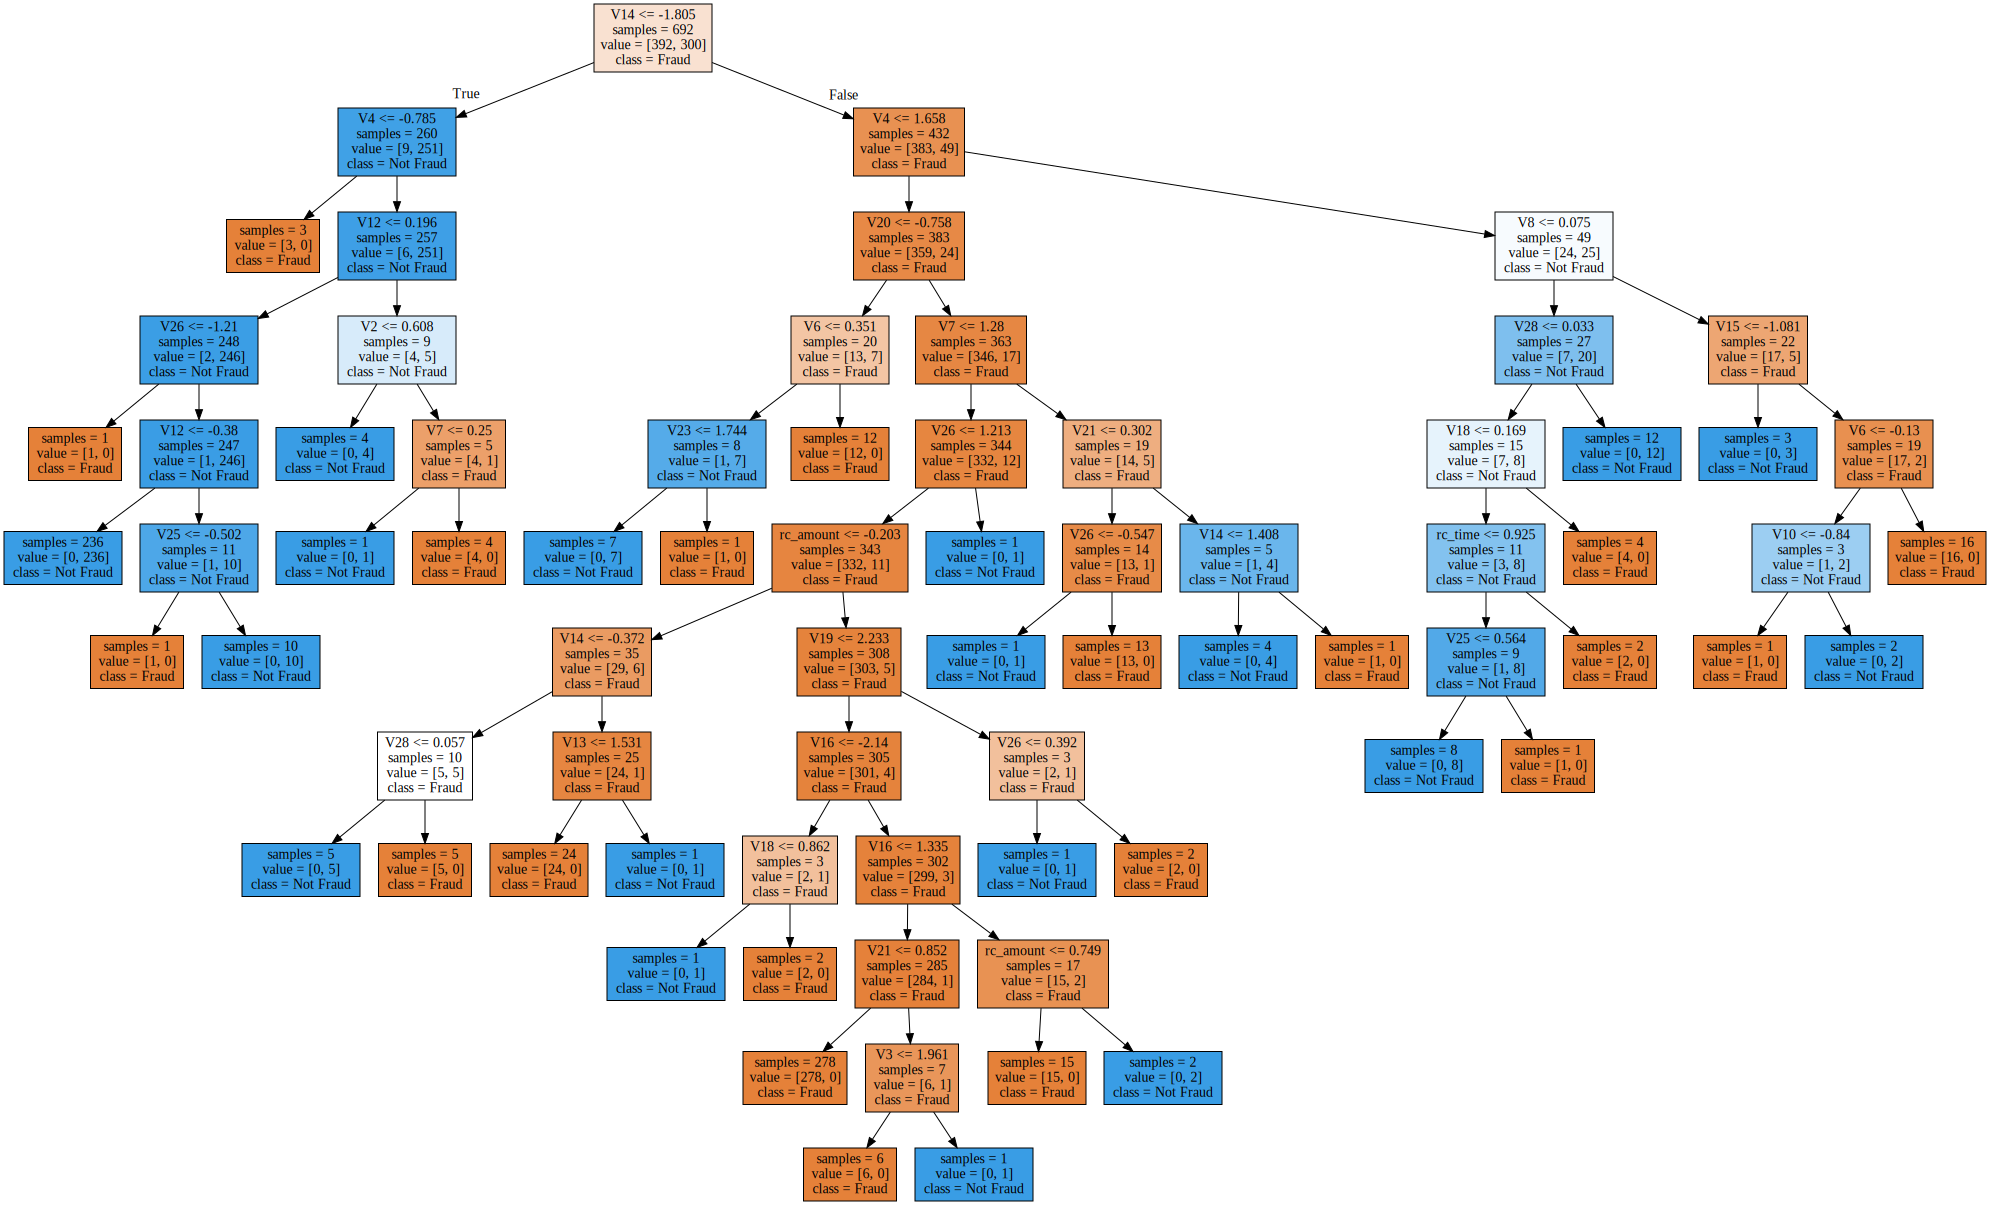

time: 691 ms


In [613]:
# Examine the Decision Tree Generated
display(graphviz.Source(tree.export_graphviz(dt, class_names = ["Fraud","Not Fraud"], feature_names= X_train.columns, filled=True, impurity=False)))

In [407]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf = GridSearchCV(dt,parameters)
clf.fit(Xe_train,ye_train)
%time

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)},
  

In [408]:
clf.best_params_

{'max_depth': 3, 'min_samples_split': 10}

In [614]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=3,min_samples_split=10).fit(Xe_train,ye_train)
print(f'Train: {dt1.score(Xe_train,ye_train):.2%} | Test: {dt1.score(Xe_test,ye_test):.2%}')

Train: 93.93% | Test: 94.80%
time: 22.1 ms


In [615]:
y_pred_dt = dt1.predict(Xe_test.values)

cnf_matrix2 = confusion_matrix(ye_test,y_pred_dt)

recall = cnf_matrix2[1,1]/(cnf_matrix2[1,0]+cnf_matrix2[1,1])

print(f"Recall metric from Decision Tree: {recall:.2%}")
print(f'F1 Score: {f1_score(ye_test, y_pred_dt):.2%}')
print('Confusion Matrix:')
cnf_matrix2

Recall metric from Decision Tree: 90.67%
F1 Score: 93.79%
Confusion Matrix:


array([[96,  2],
       [ 7, 68]], dtype=int64)

time: 17.7 ms


In [616]:
print(classification_report(ye_test, y_pred_dt, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.96        98
       Fraud       0.97      0.91      0.94        75

    accuracy                           0.95       173
   macro avg       0.95      0.94      0.95       173
weighted avg       0.95      0.95      0.95       173

time: 16.6 ms


In [663]:
dt1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

time: 3 ms


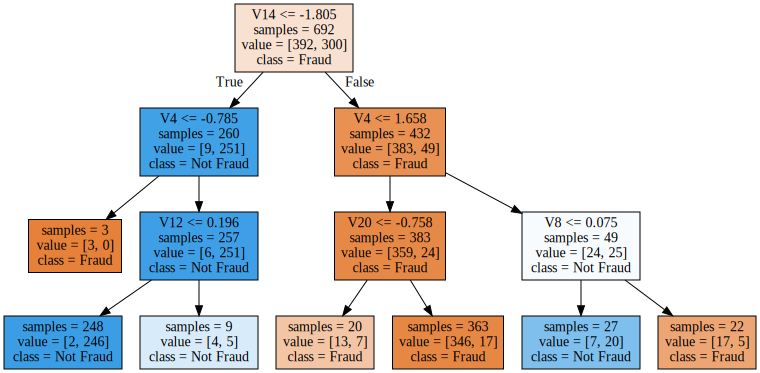

time: 64 ms


In [664]:
# Classification Decision Tree after Pruning
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

display(graphviz.Source(tree.export_graphviz(dt1, class_names = ["Fraud","Not Fraud"], feature_names= X_train.columns, filled=True, impurity=False)))

### SVM

In [626]:
svm = LinearSVC(random_state=0, dual=False, C=0.001).fit(Xe_train,ye_train)
print(f'Train: {svm.score(Xe_train,ye_train):.2%} | Test: {svm.score(Xe_test,ye_test):.2%}')
y_probs = svm._predict_proba_lr(Xe_test)[:,1]
    
fpr, tpr, _ = roc_curve(ye_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

Train: 91.04% | Test: 95.38%


0.9684353741496599

time: 28.5 ms


In [628]:
param_grid = {'C':np.arange(0.01,1,100)}
linearSVC = GridSearchCV(svm,param_grid,cv=5,scoring='roc_auc')
linearSVC.fit(Xe_train,ye_train)
print(linearSVC.best_params_)

{'C': 0.01}
time: 48.7 ms


### Random Forest

In [629]:
rf = RandomForestClassifier(random_state=0).fit(Xe_train,ye_train)
print(f'Train: {rf.score(Xe_train,ye_train):.2%} | Test: {rf.score(Xe_test,ye_test):.2%}')

Train: 100.00% | Test: 95.38%
time: 397 ms


In [421]:
# GridSearchCV to optimize the RandomForest parameters

##############################################
###### THIS TAKES 18 MIN TO RUN ############## 
##############################################

import time
start_time = time.time()


n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(Xe_train, ye_train)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 17.8min finished


--- 1068.4533665180206 seconds ---


In [630]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(Xe_train, ye_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 16.5min finished


time: 16min 32s


In [422]:
bestF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

In [425]:
# rf = bestF.best_estimator_.fit(Xe_train,ye_train)
rf = RandomForestClassifier(random_state=0, max_depth = 5,
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 800).fit(Xe_train,ye_train)

print(f'Train: {rf.score(Xe_train,ye_train):.2%} | Test: {rf.score(Xe_test,ye_test):.2%}')

Train: 95.83% | Test: 92.22%


In [426]:
rf_pred = rf.predict(Xe_test.values)

print(classification_report(ye_test, rf_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.96      0.92        84
       Fraud       0.97      0.89      0.92        96

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



In [656]:
feat = pd.DataFrame(data=dt1.feature_importances_, index=X_smote.columns, columns = ['Importance']).sort_values('Importance',ascending=False)
feat1 = pd.DataFrame(data=rf.feature_importances_, index=X_smote.columns, columns = ['Importance']).sort_values('Importance',ascending=False)

feat

,Importance
V14,0.87
V4,0.08
V8,0.02
V20,0.01
V12,0.01
V16,0.00
V27,0.00
V26,0.00
V25,0.00
V24,0.00


time: 51 ms


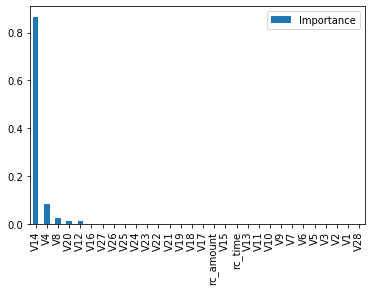

time: 293 ms


In [647]:
pd.DataFrame(data=dt1.feature_importances_, index=X_smote.columns, columns = ['Importance']).sort_values('Importance',ascending=False).plot(kind='bar')

<function matplotlib.pyplot.show(*args, **kw)>

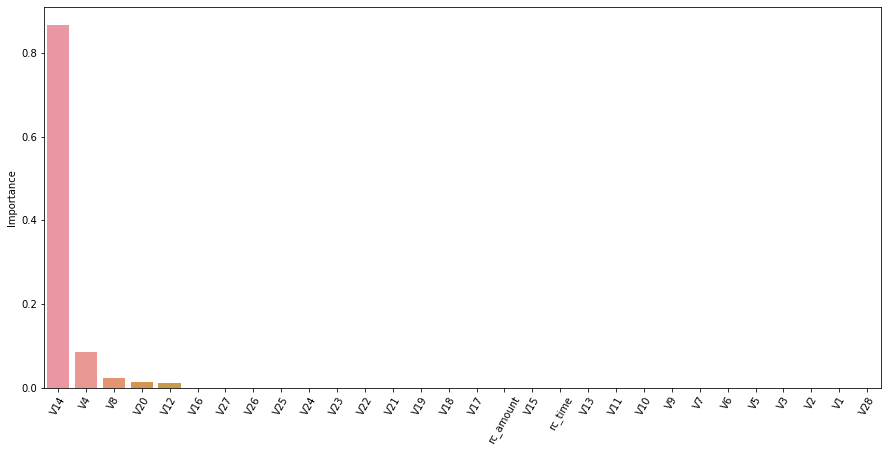

time: 348 ms


In [655]:
fig, ax = plt.subplots(figsize=(15,7))
bpt = sns.barplot(data = feat, x=feat.index, y = feat.Importance)
bpt.set_xticklabels(bpt.get_xticklabels(), rotation=60)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

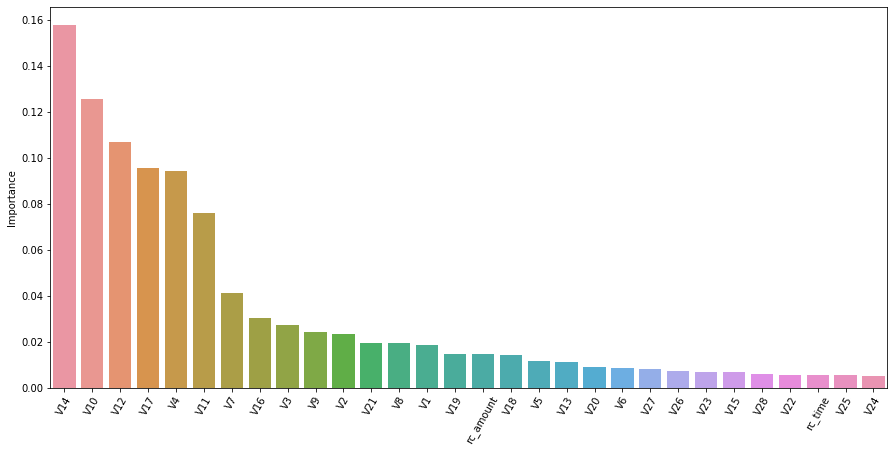

time: 346 ms


In [657]:
fig, ax = plt.subplots(figsize=(15,7))
bpt = sns.barplot(data = feat1, x=feat1.index, y = feat1.Importance)
bpt.set_xticklabels(bpt.get_xticklabels(), rotation=60)
plt.show

### Isolation Forest

In [427]:
frac = len(fraud)/len(normal)
print(frac)

iso = IsolationForest(n_estimators=100, max_samples=len(X_train), contamination=frac, verbose=0).fit(X_train, y_train)
y_pred_iso = iso.predict(X_test.values)

0.0017304750013189597


In [428]:
y_pred_iso[y_pred_iso == 1] = 0
y_pred_iso[y_pred_iso == -1] = 1
print(classification_report(y_test, y_pred_iso, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.35      0.42      0.38       100

    accuracy                           1.00     56962
   macro avg       0.67      0.71      0.69     56962
weighted avg       1.00      1.00      1.00     56962



### SMOTE

In [429]:
sm = SMOTE(random_state = 0)

In [430]:
y_train.value_counts()

0    227453
1       392
Name: Class, dtype: int64

In [431]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

Text(0.5, 1.0, 'Class Balance Post-SMOTE')

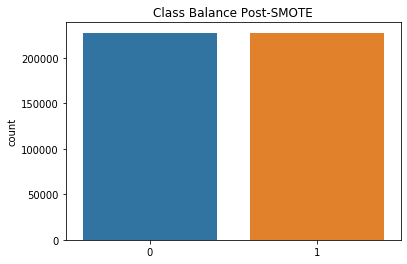

In [432]:
sns.countplot(y_train_new)
plt.title('Class Balance Post-SMOTE')

In [433]:
smote_df = pd.concat([X_train_new,pd.DataFrame(y_train_new,columns=['Class'])],axis=1)
print(smote_df.shape)
smote_df.corr()

(454906, 31)


,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
rc_amount,1.00,0.01,-0.05,-0.26,-0.01,-0.01,-0.12,0.19,0.14,0.00,...,0.20,0.05,-0.03,-0.13,0.03,-0.07,-0.03,0.06,-0.03,0.06
rc_time,0.01,1.00,0.26,-0.22,0.14,-0.21,0.29,0.11,0.23,-0.16,...,-0.05,-0.06,0.12,0.07,-0.04,-0.21,-0.04,-0.13,0.01,-0.15
V1,-0.05,0.26,1.00,-0.80,0.88,-0.62,0.87,0.35,0.88,-0.17,...,-0.32,0.06,-0.09,-0.04,-0.08,-0.06,0.05,0.17,0.19,-0.42
V2,-0.26,-0.22,-0.80,1.00,-0.86,0.71,-0.78,-0.37,-0.85,0.08,...,0.34,-0.03,0.05,0.12,0.02,0.09,0.01,-0.14,-0.02,0.50
V3,-0.01,0.14,0.88,-0.86,1.00,-0.79,0.85,0.50,0.89,-0.24,...,-0.35,0.05,-0.08,-0.03,0.00,-0.09,-0.04,0.07,0.13,-0.56
V4,-0.01,-0.21,-0.62,0.71,-0.79,1.00,-0.60,-0.47,-0.73,0.14,...,0.30,-0.01,0.12,0.03,-0.07,-0.00,0.14,0.01,-0.05,0.71
V5,-0.12,0.29,0.87,-0.78,0.85,-0.60,1.00,0.35,0.86,-0.28,...,-0.32,0.05,-0.12,-0.06,-0.15,-0.06,0.05,0.16,0.16,-0.37
V6,0.19,0.11,0.35,-0.37,0.50,-0.47,0.35,1.00,0.34,-0.55,...,-0.06,-0.12,0.08,0.27,-0.01,-0.17,-0.06,-0.19,-0.04,-0.43
V7,0.14,0.23,0.88,-0.85,0.89,-0.73,0.86,0.34,1.00,-0.02,...,-0.40,0.11,-0.20,-0.11,-0.07,0.06,0.01,0.22,0.16,-0.46
V8,0.00,-0.16,-0.17,0.08,-0.24,0.14,-0.28,-0.55,-0.02,1.00,...,-0.12,0.15,-0.16,-0.42,0.07,0.29,0.04,0.34,0.03,0.10


Text(0.5, 1, 'Correlation of Features SMOTE')

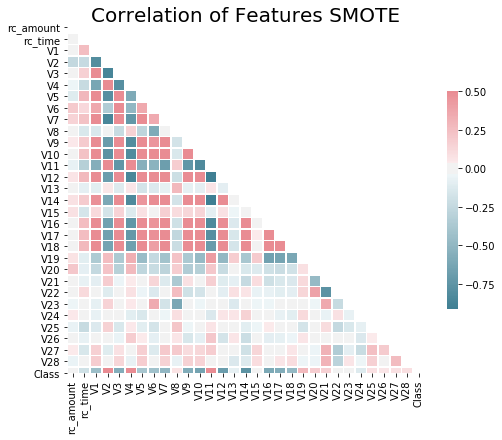

In [434]:
mask = np.triu(np.ones_like(smote_cor.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(smote_cor.corr(), mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation of Features SMOTE', fontsize=20)

In [435]:
smote_df = iqr_outlier(smote_df,neg_cor)
smote_df

--- V14 ----
Quartile 1: -9.592283254962586 | Quartile 3: -4.335666421228185
IQR: 5.257
Limit: 7.885
V14 Lower Bound: -11.13
V14 Upper Bound: 5.576
Feature V14 Outliers for Fraud: 38648
V14 outliers:[-14.266836279802801, -14.116156007430401, -13.2478885958622, -14.094451660329002, -18.049997689859396, -13.4170122721265, -13.602211465597, -14.952981039057901, -11.5838983872121, -14.2483158270781, -14.5559572107641, -11.606970376076601, -12.289133385089901, -14.979477348914198, -14.690729133641, -14.0047761755606, -12.1565865835299, -13.883778549111199, -11.221804770978599, -13.5170724083842]
 


,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.02,0.71,1.97,-0.25,-1.12,0.38,-0.17,-0.85,0.06,-0.12,...,-0.26,-0.19,-0.48,0.29,0.01,-0.29,0.26,-0.08,-0.07,0
1,-0.29,0.52,-1.17,0.61,1.39,4.92,0.92,0.56,-0.26,0.30,...,0.19,0.22,0.89,-0.49,1.26,-0.38,0.45,-0.06,-0.31,0
2,0.20,0.66,2.00,0.26,-2.05,1.09,0.83,-1.03,0.85,-0.42,...,-0.19,0.23,0.69,-0.15,-0.32,0.57,-0.42,-0.05,-0.07,0
3,-0.23,0.78,-1.58,2.37,-1.33,0.78,0.13,-0.49,0.21,1.15,...,0.04,0.19,0.62,-0.14,-0.37,0.11,-0.42,0.29,0.17,0
4,3.66,0.41,-0.37,-1.44,-0.34,-1.46,-0.79,-1.01,0.95,-0.25,...,0.44,0.89,2.22,0.66,0.44,-1.07,-0.14,0.20,0.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,0.66,0.16,-6.49,4.75,-4.40,3.39,0.32,0.26,-4.05,-6.05,...,-1.66,6.19,-2.25,0.08,0.05,0.56,-0.02,0.47,1.46,1
454901,3.70,-0.15,-3.94,0.19,-3.79,3.88,-1.94,-1.99,-3.34,1.59,...,1.24,0.88,-0.15,-0.10,0.26,-0.10,-0.25,1.15,-0.04,1
454902,0.81,-0.51,-3.32,2.51,-3.60,0.61,-2.10,-1.93,-3.04,-1.71,...,0.15,1.99,-0.63,-0.27,0.13,0.04,-0.66,-0.93,-0.93,1
454903,3.67,0.08,-1.31,-0.92,-0.01,-0.08,0.17,-0.08,0.88,-0.29,...,-0.96,-0.50,-0.53,-0.18,-0.20,-0.12,-0.43,0.03,0.08,1


In [528]:
smote_df = iqr_outlier(smote_df,neg_cor)
smote_df

--- V14 ----
Quartile 1: -7.8782002213243345 | Quartile 3: -3.7149511473696335
IQR: 4.163
Limit: 6.245
V14 Lower Bound: -11.13
V14 Upper Bound: 5.576
Feature V14 Outliers for Fraud: 0
V14 outliers:[]
 
--- V12 ----
Quartile 1: -6.7712120410882655 | Quartile 3: -2.497772362057261
IQR: 4.273
Limit: 6.41
V12 Lower Bound: -11.13
V12 Upper Bound: 5.576
Feature V12 Outliers for Fraud: 8007
V12 outliers:[-13.812404089959399, -12.686307522495598, -17.1504052507291, -14.1750301634055, -13.5801472568557, -11.3490285500915, -13.635216124726801, -15.717606646877199, -13.104933466201198, -16.218610393127, -12.15623949431, -12.893520208605402, -11.898065148453, -13.146780583189997, -11.20939375450094, -12.768523840117703, -14.205612916828281, -12.616884202140753, -13.156116228447864, -12.890075680059084]
 
--- V10 ----
Quartile 1: -5.411861579751893 | Quartile 3: -2.031684562372835
IQR: 3.38
Limit: 5.07
V10 Lower Bound: -11.13
V10 Upper Bound: 5.576
Feature V10 Outliers for Fraud: 4721
V10 outliers:

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.02,0.71,1.97,-0.25,-1.12,0.38,-0.17,-0.85,0.06,-0.12,...,-0.26,-0.19,-0.48,0.29,0.01,-0.29,0.26,-0.08,-0.07,0
1,-0.29,0.52,-1.17,0.61,1.39,4.92,0.92,0.56,-0.26,0.30,...,0.19,0.22,0.89,-0.49,1.26,-0.38,0.45,-0.06,-0.31,0
2,0.20,0.66,2.00,0.26,-2.05,1.09,0.83,-1.03,0.85,-0.42,...,-0.19,0.23,0.69,-0.15,-0.32,0.57,-0.42,-0.05,-0.07,0
3,-0.23,0.78,-1.58,2.37,-1.33,0.78,0.13,-0.49,0.21,1.15,...,0.04,0.19,0.62,-0.14,-0.37,0.11,-0.42,0.29,0.17,0
4,3.66,0.41,-0.37,-1.44,-0.34,-1.46,-0.79,-1.01,0.95,-0.25,...,0.44,0.89,2.22,0.66,0.44,-1.07,-0.14,0.20,0.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,0.66,0.16,-6.49,4.75,-4.40,3.39,0.32,0.26,-4.05,-6.05,...,-1.66,6.19,-2.25,0.08,0.05,0.56,-0.02,0.47,1.46,1
454901,3.70,-0.15,-3.94,0.19,-3.79,3.88,-1.94,-1.99,-3.34,1.59,...,1.24,0.88,-0.15,-0.10,0.26,-0.10,-0.25,1.15,-0.04,1
454902,0.81,-0.51,-3.32,2.51,-3.60,0.61,-2.10,-1.93,-3.04,-1.71,...,0.15,1.99,-0.63,-0.27,0.13,0.04,-0.66,-0.93,-0.93,1
454903,3.67,0.08,-1.31,-0.92,-0.01,-0.08,0.17,-0.08,0.88,-0.29,...,-0.96,-0.50,-0.53,-0.18,-0.20,-0.12,-0.43,0.03,0.08,1


time: 1.31 s


In [436]:
logreg.fit(X_train_new, y_train_new)

# prediction for Training data
# y_pred_sm = logreg.predict(X_train_new)

# prediction for Testing data
y_pred_sm = logreg.predict(X_test)

Recall metric in the testing dataset:  0.91
Confusion matrix, without normalization


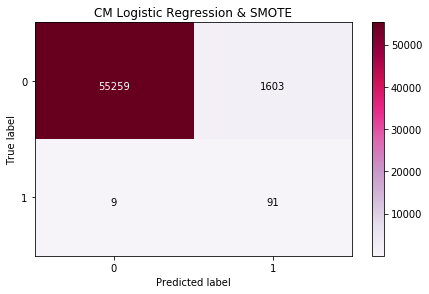

In [437]:
cnf_matrix_lrn = confusion_matrix(y_test,y_pred_sm)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix_lrn[1,1]/(cnf_matrix_lrn[1,0]+cnf_matrix_lrn[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_lrn, classes=class_names, title='CM Logistic Regression & SMOTE')
plt.xlim(-0.5, len(np.unique(y))-0.5)
plt.ylim(len(np.unique(y))-0.5, -0.5)
plt.show()

In [438]:
print("Recall metric in the testing dataset: ", cnf_matrix_lrn[1,1]/(cnf_matrix_lrn[1,0]+cnf_matrix_lrn[1,1]))
print(f'F1 Score: {f1_score(y_test, y_pred_sm)}')


Recall metric in the testing dataset:  0.91
F1 Score: 0.10144927536231883


In [727]:
X_smote

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.02,0.71,1.97,-0.25,-1.12,0.38,-0.17,-0.85,0.06,-0.12,...,0.39,-0.26,-0.19,-0.48,0.29,0.01,-0.29,0.26,-0.08,-0.07
1,-0.29,0.52,-1.17,0.61,1.39,4.92,0.92,0.56,-0.26,0.30,...,1.37,0.19,0.22,0.89,-0.49,1.26,-0.38,0.45,-0.06,-0.31
2,0.20,0.66,2.00,0.26,-2.05,1.09,0.83,-1.03,0.85,-0.42,...,0.01,-0.19,0.23,0.69,-0.15,-0.32,0.57,-0.42,-0.05,-0.07
3,-0.23,0.78,-1.58,2.37,-1.33,0.78,0.13,-0.49,0.21,1.15,...,1.08,0.04,0.19,0.62,-0.14,-0.37,0.11,-0.42,0.29,0.17
4,3.66,0.41,-0.37,-1.44,-0.34,-1.46,-0.79,-1.01,0.95,-0.25,...,-0.22,0.44,0.89,2.22,0.66,0.44,-1.07,-0.14,0.20,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,0.66,0.16,-6.49,4.75,-4.40,3.39,0.32,0.26,-4.05,-6.05,...,-0.91,-1.66,6.19,-2.25,0.08,0.05,0.56,-0.02,0.47,1.46
454901,3.70,-0.15,-3.94,0.19,-3.79,3.88,-1.94,-1.99,-3.34,1.59,...,1.22,1.24,0.88,-0.15,-0.10,0.26,-0.10,-0.25,1.15,-0.04
454902,0.81,-0.51,-3.32,2.51,-3.60,0.61,-2.10,-1.93,-3.04,-1.71,...,0.65,0.15,1.99,-0.63,-0.27,0.13,0.04,-0.66,-0.93,-0.93
454903,3.67,0.08,-1.31,-0.92,-0.01,-0.08,0.17,-0.08,0.88,-0.29,...,-1.15,-0.96,-0.50,-0.53,-0.18,-0.20,-0.12,-0.43,0.03,0.08


time: 189 ms


In [729]:
# RERUN SVC
svm = LinearSVC(random_state=0, dual=False,C=.01).fit(X_smote,y_smote)
print(f'Train: {svm.score(X_train,y_train):.2%} | Test: {svm.score(X_test,y_test):.2%}')
y_probs = svm.decision_function(X_test)
    
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

Train: 97.69% | Test: 97.65%


0.9712438887130246

time: 5.13 s


In [713]:
param_grid = {'C':np.arange(0.0000001,1,50)}
linearSVC = GridSearchCV(svm,param_grid,cv=3,scoring='roc_auc')
linearSVC.fit(X_smote,y_smote)
print(linearSVC.best_params_)

{'C': 1e-07}
time: 5.76 s


In [721]:
def plot_roc(model, X_fit, y_fit, X_te,y_te,neg=1, color='b'):

    if str(model).split("(")[0] in ['LinearSVC']:
        y_probs= model.fit(X_fit, y_fit).decision_function(X_te)
    else:
        y_probs = model.fit(X_fit, y_fit).predict_proba(X_te)[:,1]
    
    fpr, tpr, _ = roc_curve(y_te, y_probs * neg)
    roc_auc = auc(fpr, tpr)

    plt.title(f'ROC/AUC {str(model).split("(")[0]}')
    ax.plot(fpr, tpr, color,label=f'AUC {str(model).split("(")[0]}= %0.4f'% roc_auc)
    ax.legend(loc='lower right')
    ax.plot([-.05,1],[-.05,1],'r--')
    plt.xlim([-0.05,1.0])
    plt.ylim([-0.05,1.01])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
            

time: 6.53 ms


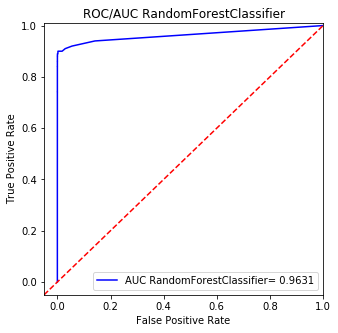

time: 10min 14s


In [738]:
fig, ax = plt.subplots(figsize = (5,5))
plot_roc(rf,X_smote,y_smote,X_test,y_test)

In [440]:
# y_score_lr1 = iso.fit(X_train_new, y_train_new).decision_function(X_test)
# fpr1, tpr1, thresh1 = roc_curve(y_test, y_score_lr1*-1)
# roc_auc1 = auc(fpr1, tpr1)

# fig, ax = plt.subplots(figsize = (5,5))
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr1, tpr1, 'b',label='AUC_ISO = %0.2f'% roc_auc1)
# plt.legend(loc='lower right')
# plt.plot([-.05,1],[-.05,1],'r--')
# plt.xlim([-0.05,1.0])
# plt.ylim([-0.05,1.01])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

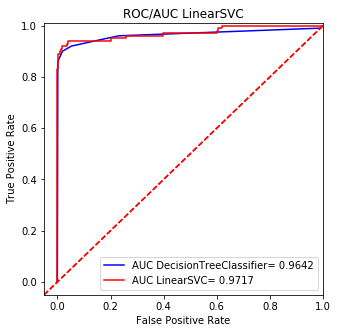

time: 18.8 s


In [516]:
fig, ax = plt.subplots(figsize = (5,5))
plot_roc(dt1,X_train_new,y_train_new,X_test,y_test,1)
plot_roc(svm,X_train_new,y_train_new,X_test,y_test,1,'r')

In [442]:
# After IQR
X_smote, y_smote = smote_df.iloc[:,:-1], smote_df.Class
X_smote.head()

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.02,0.71,1.97,-0.25,-1.12,0.38,-0.17,-0.85,0.06,-0.12,...,0.39,-0.26,-0.19,-0.48,0.29,0.01,-0.29,0.26,-0.08,-0.07
1,-0.29,0.52,-1.17,0.61,1.39,4.92,0.92,0.56,-0.26,0.30,...,1.37,0.19,0.22,0.89,-0.49,1.26,-0.38,0.45,-0.06,-0.31
2,0.20,0.66,2.00,0.26,-2.05,1.09,0.83,-1.03,0.85,-0.42,...,0.01,-0.19,0.23,0.69,-0.15,-0.32,0.57,-0.42,-0.05,-0.07
3,-0.23,0.78,-1.58,2.37,-1.33,0.78,0.13,-0.49,0.21,1.15,...,1.08,0.04,0.19,0.62,-0.14,-0.37,0.11,-0.42,0.29,0.17
4,3.66,0.41,-0.37,-1.44,-0.34,-1.46,-0.79,-1.01,0.95,-0.25,...,-0.22,0.44,0.89,2.22,0.66,0.44,-1.07,-0.14,0.20,0.33


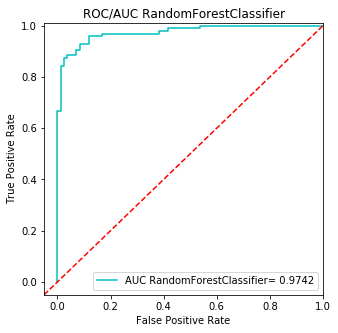

time: 3.42 s


In [586]:
# # SMOTE ROC
# y_score_smote = logreg.fit(X_smote, y_smote).decision_function(X_test)
# fpr_smote, tpr_smote, thresh_smote = roc_curve(y_test, y_score_smote)
# roc_auc_smote = auc(fpr_smote, tpr_smote)

# fig, ax = plt.subplots(figsize = (5,5))
# plt.title('Receiver Operating Char. SMOTE')
# plt.plot(fpr, tpr, 'b',label='AUC_LOG = %0.2f'% roc_auc_smote)
# plt.legend(loc='lower right')
# plt.plot([-.05,1],[-.05,1],'r--')
# plt.xlim([-0.05,1.0])
# plt.ylim([-0.05,1.01])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

fig, ax = plt.subplots(figsize = (5,5))
plot_roc(rf,Xe_train,ye_train,Xe_test,ye_test,1,'c')

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
plot_roc(svm,X_smote,y_smote,X_test,y_test)

In [ ]:
# plot_roc(dt1,X_smote,y_smote,X_test,y_test)
y_score_dt = dt1.predict(X_test)
fpr_dt, tpr_dt, thresh_smote = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fig, ax = plt.subplots(figsize = (5,5))
plt.title('Receiver Operating Char. DT')
plt.plot(fpr, tpr, 'b',label='AUC_LOG = %0.2f'% roc_auc_dt)
plt.legend(loc='lower right')
plt.plot([-.05,1],[-.05,1],'r--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# dt1.predict(X_test)

In [ ]:
y_score_dt = knn9.predict(X_test)
fpr_dt, tpr_dt, thresh_smote = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fig, ax = plt.subplots(figsize = (5,5))
plt.title('Receiver Operating Char. DT')
plt.plot(fpr, tpr, 'b',label='AUC_LOG = %0.2f'% roc_auc_dt)
plt.legend(loc='lower right')
plt.plot([-.05,1],[-.05,1],'r--')
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [447]:
pd.Series(svm.predict(X_test)).value_counts()

0    55541
1     1421
dtype: int64

Text(0.5, 1.0, 'ROC/AUC All Models')

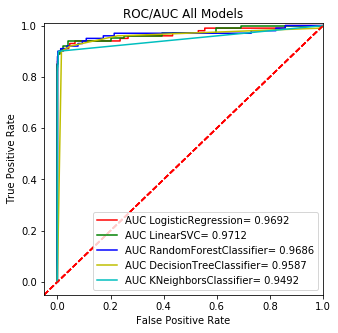

time: 41min 26s


In [517]:
##############################################
######THIS TAKES FOREVER TO RUN ############## 
##############################################

fig, ax = plt.subplots(figsize=(5,5))
colors = ['r','g','b','y','c']
models = [logreg,svm,rf,dt1,knn9]
for col,mod in zip(colors,models):
    plot_roc(mod,X_smote,y_smote,X_test,y_test,1,col)
plt.title('ROC/AUC All Models')


Text(0.5, 1.0, 'ROC/AUC All Models')

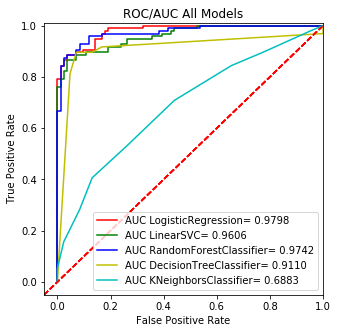

time: 3.19 s


In [518]:
fig, ax = plt.subplots(figsize=(5,5))
colors = ['r','g','b','y','c']
models = [logreg,svm,rf,dt1,knn9]
for col,mod in zip(colors,models):
    plot_roc(mod,Xe_train,ye_train,Xe_test,ye_test,1,col)
plt.title('ROC/AUC All Models')


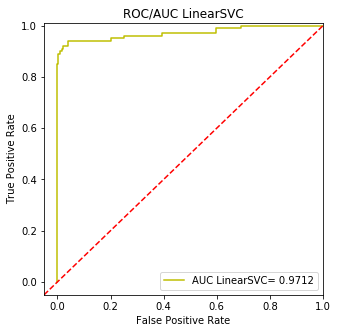

time: 5.67 s


In [741]:
fig, ax = plt.subplots(figsize=(5,5))
plot_roc(svm,X_smote,y_smote,X_test,y_test,1,'y')

Text(0.5, 1.0, 'ROC/AUC All Models')

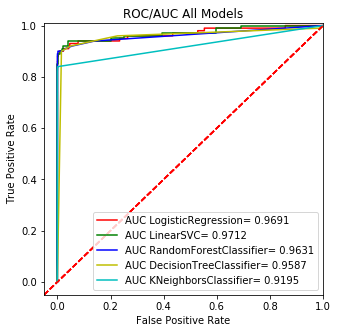

time: 16min 32s


In [739]:
fig, ax = plt.subplots(figsize=(5,5))
colors = ['r','g','b','y','c']
models = [logreg,svm,rf,dt1,knn9]
for col,mod in zip(colors,models):
    plot_roc(mod,X_smote,y_smote,X_test,y_test,1,col)
plt.title('ROC/AUC All Models')


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
colors = ['r','g','b','y','c']
models = [logreg,svm,rf,dt1,knn9]
for col,mod in zip(colors,models):
    plot_roc(mod,X_smote,y_smote,X_test,y_test,1,col)
plt.title('ROC/AUC All Models')


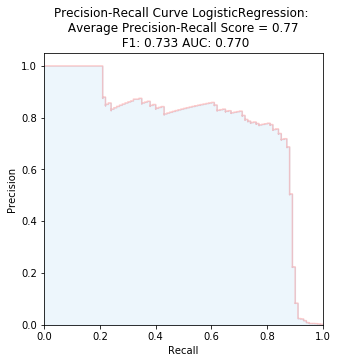

time: 5.64 s


In [534]:
def plot_precision_recall(model, X_fit, y_fit, X_te, y_te):
    
    if str(model).split("(")[0] in ['LinearSVC']:
        y_prob = model.fit(X_fit, y_fit)._predict_proba_lr(X_te)[:,1]
    else:
        y_prob = model.fit(X_fit, y_fit).predict_proba(X_te)[:, 1]
   
    average_precision = average_precision_score(y_te, y_prob)

    # predict class values
    yhat = model.predict(X_te)
    precision, recall, _ = precision_recall_curve(y_te, y_prob)
    m_f1, m_auc = f1_score(y_te, yhat), auc(recall, precision)
    # summarize scores
#     print(f'{str(model).split("(")[0]}: f1={m_f1:.3f} auc={m_auc:.3f}')
    
    # plot the precision-recall curves  
    fig = plt.figure(figsize=(5,5))
    
    plt.step(recall, precision, color='r', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#a7d5f2')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve {str(model).split("(")[0]}: \n Average Precision-Recall Score = {average_precision:0.2f} \n F1: {m_f1:.3f} AUC: {m_auc:.3f}')
    

              
              
plot_precision_recall(logreg,X_train,y_train,X_test,y_test)


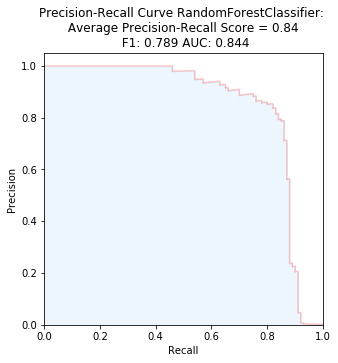

time: 16min 51s


In [507]:
plot_precision_recall(rf,X_train,y_train,X_test,y_test)

 Average Precision: 0.7707970423001328


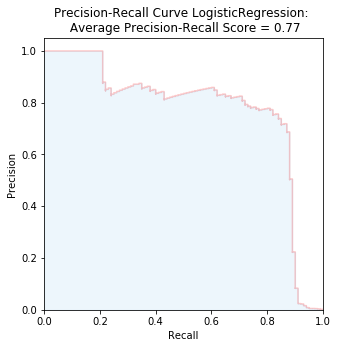

time: 6.35 s


In [490]:
plot_precision_recall(logreg,X_train,y_train,X_test,y_test)

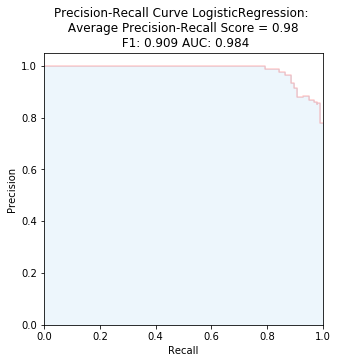

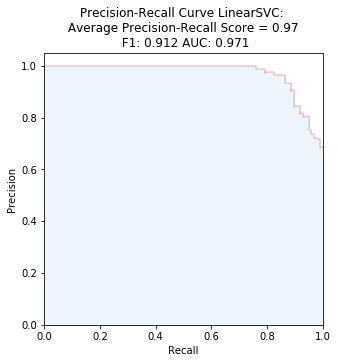

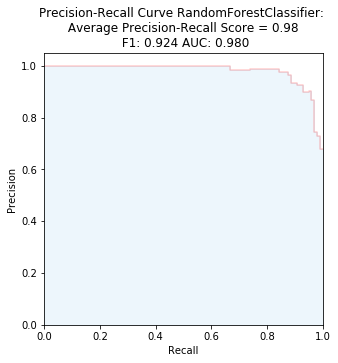

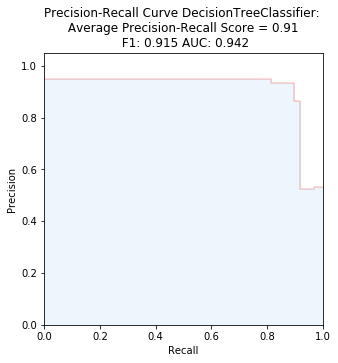

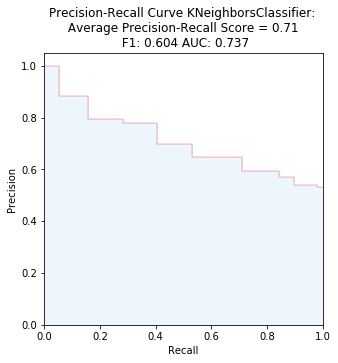

time: 1.95 s


In [539]:
for i in models:
    plot_precision_recall(i, Xe_train, ye_train, Xe_test, ye_test)

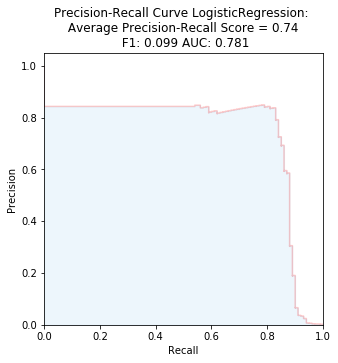

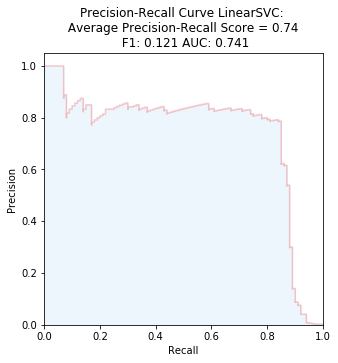

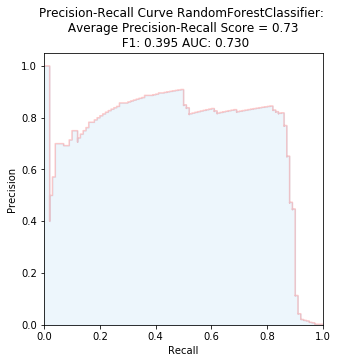

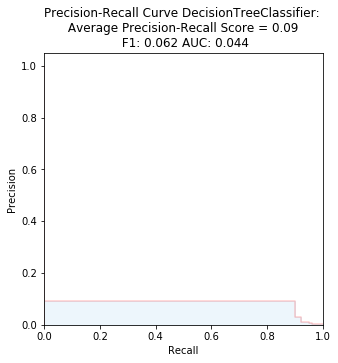

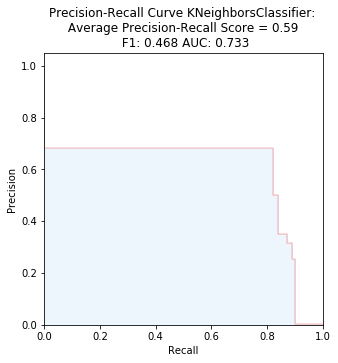

time: 50min 35s


In [639]:
for i in models:
    plot_precision_recall(i, X_smote, y_smote, X_test, y_test)

In [471]:
##############################################
######THIS TAKES FOREVER TO RUN 35 MIN ####### 
##############################################
%%time
def class_report(model,X_tr,y_tr, X_te, y_te):
    y_pred = model.fit(X_tr, y_tr).predict(X_te)
    print(classification_report(y_te, y_pred, target_names=['Not Fraud','Fraud']))
    
for i in models:
    print(str(i).split("(")[0])
    class_report(i, X_smote, y_smote, X_test, y_test)

LogisticRegression
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     56862
       Fraud       0.05      0.91      0.10       100

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

LinearSVC
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56862
       Fraud       0.06      0.92      0.12       100

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

RandomForestClassifier
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56862
       Fraud       0.25      0.90      0.39       100

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.0

In [555]:
# This is quick, you can run it 

# def class_report(model,X_tr,y_tr, X_te, y_te):
#     y_pred = model.fit(X_tr, y_tr).predict(X_te)
#     print(classification_report(y_te, y_pred, target_names=['Not Fraud','Fraud']))
    
for i in models:
    print(str(i).split("(")[0])
    class_report(i, Xe_train, ye_train, Xe_test, ye_test)

LogisticRegression
              precision    recall  f1-score   support

   Not Fraud       0.88      0.93      0.90        84
       Fraud       0.93      0.89      0.91        96

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

LinearSVC
              precision    recall  f1-score   support

   Not Fraud       0.86      0.96      0.91        84
       Fraud       0.97      0.86      0.91        96

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.91      0.91       180

RandomForestClassifier
              precision    recall  f1-score   support

   Not Fraud       0.88      0.96      0.92        84
       Fraud       0.97      0.89      0.92        96

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.9

## Predictions

In [665]:
X_sample = X_test.sample(5)
X_sample

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
2654,-0.10,-0.97,-1.54,2.30,-1.24,0.26,0.54,-0.16,0.59,0.29,...,1.01,0.60,0.01,0.45,-0.01,-0.94,-0.26,-0.35,0.58,0.47
123467,0.74,-0.09,1.40,-1.06,-0.06,-1.49,-1.12,-0.72,-0.60,-0.18,...,0.43,-0.21,-0.50,-1.30,0.11,-0.07,0.22,-0.53,-0.01,0.02
271355,5.58,0.94,-7.61,-2.51,-3.17,1.13,-3.33,0.42,0.71,1.23,...,0.54,-1.96,-0.26,0.42,-1.88,0.94,-0.03,-0.53,-0.40,0.25
155117,0.57,0.23,2.04,-0.93,-0.93,-0.41,-0.48,0.14,-0.85,-0.03,...,-0.59,-0.51,-0.47,-0.69,0.24,0.21,-0.38,0.49,-0.08,-0.06
78137,-0.14,-0.32,1.19,-0.28,0.57,-0.12,-0.61,0.02,-0.58,0.28,...,0.03,-0.17,-0.15,-0.55,0.15,-0.31,-0.11,0.83,-0.06,-0.00


time: 202 ms


In [703]:
diction = {0:'Not-Fraud',1:'Fraud'}

pred = list(rf.predict(test1))
for i in rf_pred:
    print(diction[i])

Not-Fraud
Not-Fraud
Not-Fraud
Not-Fraud
Not-Fraud
Fraud
Fraud
time: 24.7 ms


In [685]:
logreg.predict(test1)

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

time: 11 ms


In [687]:
knn9.predict(test1)

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

time: 48.1 ms


In [688]:
dt.predict(test1)

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

time: 9.99 ms


In [689]:
svm.predict(test1)

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

time: 9.99 ms


In [ ]:
# Evaluate all models

In [671]:
X_test

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
241676,-0.29,0.78,-1.22,1.84,-0.94,-0.49,0.34,-0.64,0.22,0.87,...,0.05,-0.02,0.12,0.52,-0.24,-0.46,-0.07,0.59,0.24,0.19
224633,2.60,0.70,-1.37,-1.47,1.54,-2.81,-1.02,-0.44,-0.03,0.19,...,-0.64,0.26,0.01,-0.08,0.22,-0.08,0.65,-0.14,0.18,0.12
19417,2.16,-0.64,0.93,-1.01,0.67,0.85,-0.82,0.97,-0.71,0.25,...,0.78,0.25,0.02,0.13,-0.45,-0.90,0.63,0.76,-0.01,0.03
222092,7.46,0.68,-0.71,-1.18,0.08,-0.39,-1.54,0.61,2.01,-0.08,...,-0.71,1.06,0.56,0.64,1.28,0.70,-0.33,0.53,-0.19,0.05
208007,-0.22,0.61,-0.17,0.96,-0.91,-0.97,1.37,-0.51,0.19,-0.84,...,0.40,-0.16,0.63,-0.43,-0.26,-1.02,-2.11,-0.11,0.74,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224481,14.61,0.69,-0.02,-4.19,-2.70,0.25,-0.72,1.33,0.86,0.01,...,-1.39,1.39,0.15,-1.28,-0.61,-1.66,-0.70,-0.50,-0.15,0.11
190932,0.25,0.52,2.00,-0.64,-0.73,0.03,-0.45,-0.09,-0.64,0.01,...,0.26,-0.14,0.13,0.53,-0.01,-0.97,-0.06,0.19,0.01,-0.05
8306,-0.10,-0.86,-0.31,0.63,2.11,-0.19,-0.53,-0.55,0.12,0.01,...,-0.82,-0.11,0.06,0.42,-0.03,0.62,-0.38,0.99,-0.05,0.01
168714,0.50,0.41,1.80,-0.48,-2.27,0.22,1.19,0.98,0.20,0.34,...,-1.05,-0.41,0.26,0.83,0.01,-1.74,0.02,0.67,-0.06,-0.11


time: 71.2 ms


In [673]:
pd.Series(y_test).value_counts()

0    56862
1      100
Name: Class, dtype: int64

time: 33 ms


In [681]:
samplee = pd.concat([X_test,y_test],axis=1)
samplee = samplee.loc[samplee.Class==1][:2].drop('Class',axis=1)
samplee

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
46909,-0.29,-0.49,-4.08,0.96,-5.08,4.96,-0.16,-2.83,-7.62,1.62,...,2.63,0.06,1.03,0.17,-1.02,-0.48,-0.30,-0.11,1.90,0.51
154694,4.54,0.21,-2.88,4.57,-9.55,4.44,-3.65,-1.88,-3.51,1.55,...,1.48,0.11,1.27,1.30,-0.00,-0.36,-0.60,-0.39,0.59,-0.24


time: 41.1 ms


In [684]:
test1 = pd.concat([X_sample,samplee])
test1

,rc_amount,rc_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
2654,-0.10,-0.97,-1.54,2.30,-1.24,0.26,0.54,-0.16,0.59,0.29,...,1.01,0.60,0.01,0.45,-0.01,-0.94,-0.26,-0.35,0.58,0.47
123467,0.74,-0.09,1.40,-1.06,-0.06,-1.49,-1.12,-0.72,-0.60,-0.18,...,0.43,-0.21,-0.50,-1.30,0.11,-0.07,0.22,-0.53,-0.01,0.02
271355,5.58,0.94,-7.61,-2.51,-3.17,1.13,-3.33,0.42,0.71,1.23,...,0.54,-1.96,-0.26,0.42,-1.88,0.94,-0.03,-0.53,-0.40,0.25
155117,0.57,0.23,2.04,-0.93,-0.93,-0.41,-0.48,0.14,-0.85,-0.03,...,-0.59,-0.51,-0.47,-0.69,0.24,0.21,-0.38,0.49,-0.08,-0.06
78137,-0.14,-0.32,1.19,-0.28,0.57,-0.12,-0.61,0.02,-0.58,0.28,...,0.03,-0.17,-0.15,-0.55,0.15,-0.31,-0.11,0.83,-0.06,-0.00
46909,-0.29,-0.49,-4.08,0.96,-5.08,4.96,-0.16,-2.83,-7.62,1.62,...,2.63,0.06,1.03,0.17,-1.02,-0.48,-0.30,-0.11,1.90,0.51
154694,4.54,0.21,-2.88,4.57,-9.55,4.44,-3.65,-1.88,-3.51,1.55,...,1.48,0.11,1.27,1.30,-0.00,-0.36,-0.60,-0.39,0.59,-0.24


time: 34 ms
